# Basic Example

This short notebook shows how to get started with HiggsDNA and [Coffea](https://github.com/CoffeaTeam/coffea).

In [1]:
import awkward as ak
import numpy as np
import hist
import json
from importlib import resources
import matplotlib.pyplot as plt

In [2]:
year = "2017"

In [5]:
columns_MC = ['mass', 'tag_eta', 'tag_electronVeto', 'probe_electronVeto', 'n_jets', 'tag_r9',  'probe_r9', 'tag_isScEtaEB', 'probe_isScEtaEB', 'weight', 'tag_mvaID', 'tag_isScEtaEE', 'tag_energy', 'tag_pt', 'tag_weight', 'tag_charge', 'probe_eta', 'probe_mvaID', 'probe_isScEtaEE', 'probe_ScEta', 'probe_pt', 'first_jet_hFlav', 'second_jet_hFlav', 'third_jet_hFlav', 'dijet_phi', 'sigmaMrv', 'PV_score', 'LeadPhoton_pt_mgg', 'LeadPhoton_mvaID', 'SubleadPhoton_mvaID', 'dZ_1', 'dZ_2', 'bdt_score', 'pt', 'dijet_pt', 'dijet_eta', 'dijet_mass', 'SubleadPhoton_pt_mgg', 'Diphoton_cos_dPhi', 'LeadPhoton_eta', 'SubleadPhoton_eta', 'eta', 'n_b_jets_medium', 'n_b_jets_loose', 'first_jet_pt','first_jet_eta', 'DeltaPhi_gamma1_cjet', 'DeltaPhi_gamma2_cjet', 'dEta_ljh', 'dEta_sljh', 'dEta_ljslj', 'dR_ljlp', 'lj_ptoM', 'MET_pt', 'MET_sumEt', 'MET_phi', 'MET_significance', 'nMuon', 'nTau', 'nElectron', 'ggh_vs_hb_bdt_sig_score', 'ggh_vs_hb_bdt_tth_score', 'ggh_vs_hb_bdt_vbf_score', 'ggh_vs_hb_bdt_vh_score', "vtxProb", "first_jet_particleNetAK4_CvsL", "first_jet_particleNetAK4_CvsB"]

columns_data = ['mass', 'tag_eta', 'tag_electronVeto', 'tag_isScEtaEB', 'tag_r9', 'probe_r9', 'probe_electronVeto', 'probe_isScEtaEB', 'n_jets', 'tag_mvaID', 'tag_isScEtaEE', 'tag_pt', 'probe_eta', 'probe_mvaID', 'probe_isScEtaEE', 'probe_pt', 'probe_charge', 'first_jet_hFlav', 'third_jet_hFlav', 'dijet_phi', 'sigmaMrv', 'PV_score', 'LeadPhoton_pt_mgg', 'LeadPhoton_mvaID', 'SubleadPhoton_mvaID', 'dZ_1', 'dZ_2', 'bdt_score', 'pt', 'dijet_pt', 'dijet_eta', 'dijet_mass', 'SubleadPhoton_pt_mgg', 'Diphoton_cos_dPhi', 'LeadPhoton_eta', 'SubleadPhoton_eta', 'eta', 'n_b_jets_medium', 'n_b_jets_loose', 'first_jet_pt', 'first_jet_eta',  'DeltaPhi_gamma1_cjet', 'DeltaPhi_gamma2_cjet', 'dEta_ljh', 'dEta_sljh', 'dEta_ljslj', 'dR_ljlp', 'lj_ptoM', 'MET_pt', 'MET_sumEt', 'MET_phi', 'MET_significance', 'nMuon', 'nTau', 'nElectron', 'ggh_vs_hb_bdt_sig_score', 'ggh_vs_hb_bdt_tth_score', 'ggh_vs_hb_bdt_vbf_score', 'ggh_vs_hb_bdt_vh_score', "vtxProb", "first_jet_particleNetAK4_CvsL", "first_jet_particleNetAK4_CvsB"]

In [6]:
fileset_original = {
    "data": ak.from_parquet("/pnfs/psi.ch/cms/trivcat/store/user/bevila_t/test2/phys/xpluscharm/HiggsDNA_output/TnP_CQR_2017_250118/TnP_HpC_Data_2017_v11/merged/Data_2017", columns=columns_data, lazy=True),
    "DY": ak.from_parquet("/pnfs/psi.ch/cms/trivcat/store/user/bevila_t/test2/phys/xpluscharm/HiggsDNA_output/TnP_CQR_2017_250118/TnP_HpC_DY_2017/merged/DYJetsToLL_M-50_2017", columns=columns_MC, lazy=True),
    "ttH": ak.from_parquet("/pnfs/psi.ch/cms/trivcat/store/user/bevila_t/test2/phys/xpluscharm/HiggsDNA_output/TnP_CQR_2017_250118/TnP_HpC_ttH_samples_2017/merged/tth_M125_2017", columns=columns_MC, lazy=True),
    "TTTo2L2Nu": ak.from_parquet("/pnfs/psi.ch/cms/trivcat/store/user/bevila_t/test2/phys/xpluscharm/HiggsDNA_output/TnP_CQR_2017_250118/TnP_HpC_TTTo2L2Nu_samples_2017/merged/TTTo2L2Nu_2017", columns=columns_MC, lazy=True)
    #"data": ak.from_parquet("/pnfs/psi.ch/cms/trivcat/store/user/bevila_t/test2/phys/xpluscharm/HiggsDNA_output/TnP_CQR_070125/TnP_HpC_Data_2017_v11/merged/Data_2017", columns=columns_data, lazy=True),
    #"MC": ak.from_parquet("/pnfs/psi.ch/cms/trivcat/store/user/bevila_t/test2/phys/xpluscharm/HiggsDNA_output/TnP_CQR_070125/TnP_HpC_DY_2017/DYJetsToLL_M-50_2017/nominal", columns=columns_MC, lazy=True)
    #"MC": ak.from_parquet("/pnfs/psi.ch/cms/trivcat/store/user/bevila_t/test2/phys/xpluscharm/HiggsDNA_output/TnP_HpC_DY_eVeto_2017_expID_2/DYJetsToLL_M-50_2017/", columns=columns_MC, lazy=True),
    #"data": ak.from_parquet("/pnfs/psi.ch/cms/trivcat/store/user/bevila_t/test2/phys/xpluscharm/HiggsDNA_output/TnP_HpC_DY_eVeto_2017_expID_2/Data_2017/", columns=columns_data, lazy=True)
    #"MC": ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/master_240821/higgs-dna-tiziano-bevilacqua/output/HpC_TnP_2017_eVeto_expID/merged/DYJetsToLL_M-50_2017/NOTAG_merged.parquet", columns=columns_MC, lazy=True),
    # "data": ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/master_240821/higgs-dna-tiziano-bevilacqua/output/HpC_TnP_2017_eVeto_expID/merged/Data_2017/", columns=columns_data, lazy=True)
    #"data": ak.from_parquet("/pnfs/psi.ch/cms/trivcat/store/user/bevila_t/test2/phys/xpluscharm/HiggsDNA_output/TnP_HpC_DY_eVeto_2017/merged/DYJetsToLL_M-50_2017/", columns=columns_data, lazy=True)
}

In [7]:
norm_1fb = {
    "ggh": 48.58 * 0.00227 * 1000,
    "ttH": 0.5071 * 0.00227 * 1000,
    "thw": 0.01517 * 0.00227 * 1000,
    "thq": 0.07425 * 0.00227 * 1000,
    "vbf": 3.782 * 0.00227 * 1000,
    "vh": 2.2555 * 0.00227 * 1000,
    "bh": 0.6654 * 0.00227 * 1000,
    "ch": 0.09013 * 0.00227 * 1000,
    "DY": 6225.42 * 1000,
    #"TTTo2L2Nu": 687.1 * 1000,
    "TTTo2L2Nu": 88.2877 * 1000,
    "TTToSemiLeptonic": 365.3452 * 1000,
}

In [8]:
meta = {
    "masks": {
        "DY": (fileset_original["DY"].mass > 80) & (fileset_original["DY"].mass < 100) & (~fileset_original["DY"].tag_electronVeto) & (~fileset_original["DY"].probe_electronVeto) & (fileset_original["DY"].n_jets >= 0) & (fileset_original["DY"].tag_r9 > 0.96)  & (fileset_original["DY"].probe_r9 > 0.96) & (fileset_original["DY"].tag_isScEtaEB) & (fileset_original["DY"].probe_isScEtaEB),
        "ttH": (fileset_original["ttH"].mass > 80) & (fileset_original["ttH"].mass < 100) & (~fileset_original["ttH"].tag_electronVeto) & (~fileset_original["ttH"].probe_electronVeto) & (fileset_original["ttH"].n_jets >= 0) & (fileset_original["ttH"].tag_r9 > 0.96)  & (fileset_original["ttH"].probe_r9 > 0.96) & (fileset_original["ttH"].tag_isScEtaEB) & (fileset_original["ttH"].probe_isScEtaEB),
        "TTTo2L2Nu": (fileset_original["TTTo2L2Nu"].mass > 80) & (fileset_original["TTTo2L2Nu"].mass < 100) & (~fileset_original["TTTo2L2Nu"].tag_electronVeto) & (~fileset_original["TTTo2L2Nu"].probe_electronVeto) & (fileset_original["TTTo2L2Nu"].n_jets >= 0) & (fileset_original["TTTo2L2Nu"].tag_r9 > 0.96)  & (fileset_original["TTTo2L2Nu"].probe_r9 > 0.96) & (fileset_original["TTTo2L2Nu"].tag_isScEtaEB) & (fileset_original["TTTo2L2Nu"].probe_isScEtaEB),
        "data": (fileset_original["data"].mass > 80) & (fileset_original["data"].mass < 100) & (~fileset_original["data"].tag_electronVeto) & (~fileset_original["data"].probe_electronVeto) & (fileset_original["data"].n_jets >= 0) & (fileset_original["data"].tag_r9 > 0.96) & (fileset_original["data"].probe_r9 > 0.96) & (fileset_original["data"].tag_isScEtaEB)  & (fileset_original["data"].probe_isScEtaEB) 
    },
    "eff_t_acc": {
        "DY": ak.sum(fileset_original["DY"]["weight"]),
        "ttH": ak.sum(fileset_original["ttH"]["weight"]),
        "TTTo2L2Nu": ak.sum(fileset_original["TTTo2L2Nu"]["weight"]),
        "data": 1,
    },
    "norm": {        
        "DY": (ak.sum(fileset_original["DY"]["weight"]) * norm_1fb["DY"]) / ((ak.sum(fileset_original["DY"]["weight"]) * norm_1fb["DY"]) + (ak.sum(fileset_original["ttH"]["weight"]) * norm_1fb["ttH"]) + (ak.sum(fileset_original["TTTo2L2Nu"]["weight"]) * norm_1fb["TTTo2L2Nu"])),
        "ttH": (ak.sum(fileset_original["ttH"]["weight"]) * norm_1fb["ttH"]) / ((ak.sum(fileset_original["DY"]["weight"]) * norm_1fb["DY"]) + (ak.sum(fileset_original["ttH"]["weight"]) * norm_1fb["ttH"]) + (ak.sum(fileset_original["TTTo2L2Nu"]["weight"]) * norm_1fb["TTTo2L2Nu"])),
        "TTTo2L2Nu": (ak.sum(fileset_original["TTTo2L2Nu"]["weight"]) * norm_1fb["TTTo2L2Nu"]) / ((ak.sum(fileset_original["DY"]["weight"]) * norm_1fb["DY"]) + (ak.sum(fileset_original["ttH"]["weight"]) * norm_1fb["ttH"]) + (ak.sum(fileset_original["TTTo2L2Nu"]["weight"]) * norm_1fb["TTTo2L2Nu"])),
        "data": len(fileset_original["data"])
    }
}

In [9]:
fileset = {}
for i, f in enumerate([*fileset_original]):
    print(f)
    fileset[f] = fileset_original[f][meta["masks"][f]]
    fileset[f]["proc_id"] = ak.ones_like(fileset[f].mass) * i

data
DY
ttH
TTTo2L2Nu


In [10]:
print("DY number of events:", len (fileset_original["DY"]))
print("ttH number of events:", len (fileset_original["ttH"]))
print("TTTo2L2Nu number of events:", len (fileset_original["TTTo2L2Nu"]))
print("data number of events:", len (fileset_original["data"]))

DY number of events: 11610008
ttH number of events: 4834
TTTo2L2Nu number of events: 3566352
data number of events: 14900711


In [11]:
for f in [*fileset]:
    if hasattr(fileset[f], "weight"):
        fileset[f]["weight_norm"] = fileset[f]["weight"] * norm_1fb[f]
    else:
        meta["norm"][f] = len(fileset[f]),
        if len(fileset[f]):
            fileset[f]["weight_norm"] = ak.ones_like(fileset[f]["mass"])
        else:
            fileset[f]["weight_norm"] = ak.ones_like(fileset[f]["mass"])
            fileset[f]["square_weight"] = ak.ones_like(fileset[f]["mass"])


In [12]:
fileset["MC"] = ak.concatenate([fileset["DY"], fileset["ttH"], fileset["TTTo2L2Nu"]])

In [13]:
for f in fileset["MC"].fields:
    if "weight" not in f:
        print(f)

mass
tag_eta
tag_electronVeto
probe_electronVeto
n_jets
tag_r9
probe_r9
tag_isScEtaEB
probe_isScEtaEB
tag_mvaID
tag_isScEtaEE
tag_energy
tag_pt
tag_charge
probe_eta
probe_mvaID
probe_isScEtaEE
probe_ScEta
probe_pt
first_jet_hFlav
second_jet_hFlav
third_jet_hFlav
dijet_phi
sigmaMrv
PV_score
LeadPhoton_pt_mgg
LeadPhoton_mvaID
SubleadPhoton_mvaID
dZ_1
dZ_2
bdt_score
pt
dijet_pt
dijet_eta
dijet_mass
SubleadPhoton_pt_mgg
Diphoton_cos_dPhi
LeadPhoton_eta
SubleadPhoton_eta
eta
n_b_jets_medium
n_b_jets_loose
first_jet_pt
first_jet_eta
DeltaPhi_gamma1_cjet
DeltaPhi_gamma2_cjet
dEta_ljh
dEta_sljh
dEta_ljslj
dR_ljlp
lj_ptoM
MET_pt
MET_sumEt
MET_phi
MET_significance
nMuon
nTau
nElectron
ggh_vs_hb_bdt_sig_score
ggh_vs_hb_bdt_tth_score
ggh_vs_hb_bdt_vbf_score
ggh_vs_hb_bdt_vh_score
vtxProb
first_jet_particleNetAK4_CvsL
first_jet_particleNetAK4_CvsB
proc_id


In [14]:
for sample in [*fileset]:
    print(sample, fileset[sample].ggh_vs_hb_bdt_sig_score)

data [0.965, 0.972, 0.976, 0.99, 0.806, 0.875, ... 0.831, 0.957, 0.536, 0.82, 0.942]
DY [0.0754, 0.981, 0.654, 0.911, 0.959, 0.968, ... 0.869, 0.949, 0.976, 0.978, 0.503]
ttH [0.00212, 0.00537, 0.622, 0.037, 7.83e-05, ... 0.000284, 0.113, 0.0163, 0.000548]
TTTo2L2Nu [0.000342, 0.000626, 0.0464, 0.00888, 0.00251, ... 0.286, 0.0428, 0.213, 0.236, 0.12]
MC [0.0754, 0.981, 0.654, 0.911, 0.959, 0.968, ... 0.286, 0.0428, 0.213, 0.236, 0.12]


In [15]:
single_plot = False

In [16]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "mass"
min_ = 60.
max_ = 120
nbins = 80

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
    
LeadPhoton_et_cax = hist.axis.StrCategory(["data", "MC"], name="c")
LeadPhoton_et_cax_split = hist.axis.StrCategory(["DY", "ttH", "TTTo2L2Nu"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_split = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_split)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum_ = 0.
title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"
for sample in ["MC", "data"]:
    if sample == "data":
        sum_ += len(fileset[sample])
        integrals[sample] = len(fileset[sample])
    else:
        sum_ += ak.sum(fileset[sample][wgt])
        integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum_

for sample in ["MC", "data"]:
    if sample == "data":
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c="MC")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c="MC")
        
        full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 1], weight = fileset[sample][wgt][fileset[sample]["proc_id"] == 1], c="DY")
        full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 2], weight = fileset[sample][wgt][fileset[sample]["proc_id"] == 2], c="ttH")
        full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 3], weight = fileset[sample][wgt][fileset[sample]["proc_id"] == 3], c="TTTo2L2Nu")

h_stack = full_hist.stack("c")
h_stack_split = full_hist_split.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2

h_stack_split["DY"] =  h_stack_split["DY"] / integrals["MC"]
h_stack_split["ttH"] =  h_stack_split["ttH"] / integrals["MC"]
h_stack_split["TTTo2L2Nu"] =  h_stack_split["TTTo2L2Nu"] / integrals["MC"]

h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

if single_plot:
    h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
else:
    h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
    h_stack_split[::-1].plot(ax=ax0, stack=True, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in ["data", "MC"]: # [*fileset]:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in ["data", "MC"]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["orange", "royalblue"]
for j, sample in enumerate(["data", "MC"]):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(["data", "MC"]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.75,1.25])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()

weight_box = '\n'.join((
    r'r9 > 0.96',
    r'EB-EB',
    ))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.5)
# place a text box in upper left in axes coords
ax0.text(0.1, 0.9, weight_box, transform=ax0.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_{year}.pdf")

/tmp/ipykernel_16434/303172611.py:116: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["MC"],
/tmp/ipykernel_16434/303172611.py:120: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_16434/303172611.py:123: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")


<Figure size 640x480 with 0 Axes>

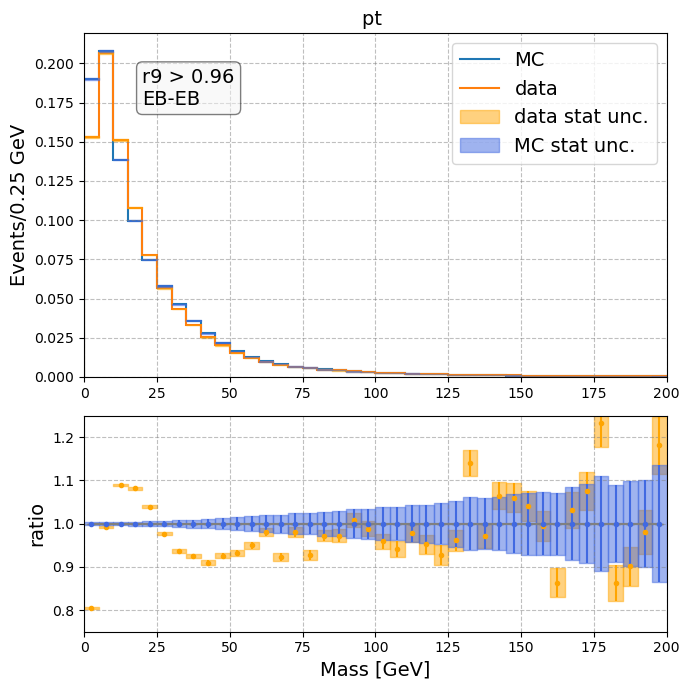

<Figure size 640x480 with 0 Axes>

In [17]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "pt"
min_ = 0.
max_ = 200
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["data", "MC"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum_ = 0.
title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"
for sample in ["MC", "data"]:
    if sample == "data":
        sum_ += len(fileset[sample])
        integrals[sample] = len(fileset[sample])
    else:
        sum_ += ak.sum(fileset[sample][wgt])
        integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum_

for sample in ["MC", "data"]:
    if sample == "data":
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c="MC")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c="MC")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2
h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in ["data", "MC"]: # [*fileset]:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in ["data", "MC"]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["orange", "royalblue"]
for j, sample in enumerate(["data", "MC"]):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(["data", "MC"]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.75,1.25])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()

weight_box = '\n'.join((
    r'r9 > 0.96',
    r'EB-EB',
    ))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.5)
# place a text box in upper left in axes coords
ax0.text(0.1, 0.9, weight_box, transform=ax0.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_{year}.pdf")

In [18]:
import correctionlib
import correctionlib.schemav2 as cs
import rich
from optparse import OptionParser

import hist

In [19]:
from correctionlib import convert

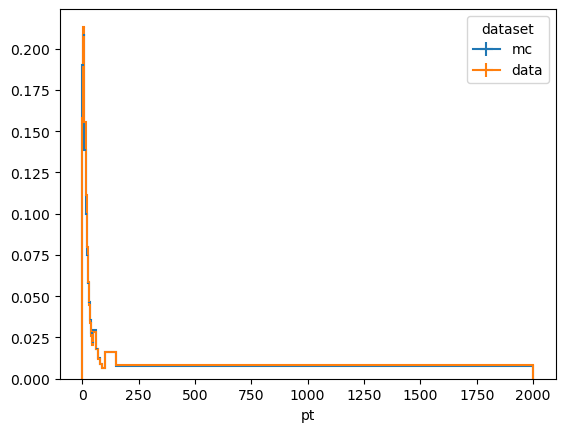

In [20]:
min_pt = 0.
max_pt = 240
nbins = 60
var = "pt"
var2 = "mass"
bin_edges_pt = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80 ,90, 100, 150, 2000])  # Adjust as needed
bin_edges_mass = np.array([60, 70, 75, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 105, 110, 120])  # Adjust as needed

dists = (
    hist.Hist.new
    .StrCat(["mc", "data"], name="dataset", growth=True)
    .Var(bin_edges_pt, name="pt", label="pt")
    .Var(bin_edges_mass, name="mass", label="mass")
    .Weight()
    .fill(
        dataset="mc",
        pt=fileset["MC"][var],
        mass=fileset["MC"][var2],
        weight=fileset["MC"].weight_norm / ak.sum(fileset["MC"].weight_norm)
    )
    .fill(
        dataset="data",
        pt=fileset["data"][var],
        mass=fileset["data"][var2],
        weight=fileset["data"].weight_norm / ak.sum(fileset["data"].weight_norm)
    )
)

mc_mass = dists["mc", :, :].project("mass")
data_mass = dists["data", :, :].project("mass")
mc_pt = dists["mc", :, :].project("pt")
data_pt = dists["data", :, :].project("pt")

fig, ax = plt.subplots()
mc_mass.plot1d(ax=ax, label="mc")
data_mass.plot1d(ax=ax, label="data")
ax.legend(title="dataset")

fig, ax = plt.subplots()
mc_pt.plot1d(ax=ax, label="mc")
data_pt.plot1d(ax=ax, label="data")
ax.legend(title="dataset")

In [21]:
den = dists["mc", :, :].values()
num = dists["data", :, :].values()
sf_abs = np.where(
    (num > 0) & (den > 0),
    num / den,
    1.0,
)

# a quick way to plot the scale factor is to steal the axis definitions from the input histograms:
sfhist_abs = hist.Hist(*dists.axes[1:], data=sf_abs)

# Access the histogram data and edges
values = sfhist_abs.values()
edges = sfhist_abs.axes[0].edges

sfhist_abs.plot2d()

/tmp/ipykernel_16434/2208415620.py:5: RuntimeWarning: invalid value encountered in divide
  num / den,


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f555fb2ce50>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f555fb4fe20>, text=[])

In [22]:
# without a name, the resulting object will fail validation
sfhist_abs.name = "Z_pt_mc_to_nominal_2D"
sfhist_abs.label = "reweighted"
mc_to_data = convert.from_histogram(sfhist_abs)
mc_to_data.description = "Reweights MC Z pt and mass to agree with data"
# set overflow bins behavior (default is to raise an error when out of bounds)
mc_to_data.data.flow = "clamp"
rich.print(mc_to_data)

📈 Z_pt_mc_to_nominal_2D (v0)
Reweights MC Z pt and mass to agree with data
Node counts: MultiBinning: 1
╭───────────── ▶ input ─────────────╮ ╭───────────── ▶ input ─────────────╮
│ pt (real)                         │ │ mass (real)                       │
│ pt                                │ │ mass                              │
│ Range: [0.0, 2000.0), overflow ok │ │ Range: [60.0, 120.0), overflow ok │
╰───────────────────────────────────╯ ╰───────────────────────────────────╯
╭──── ◀ output ─────╮
│ reweighted (real) │
│ No description    │
╰───────────────────╯

In [23]:
dists.fill(
    dataset="mc reweighted",
    pt=fileset["MC"][var],
    mass=fileset["MC"][var2],
    weight=fileset["MC"].weight_norm * mc_to_data.to_evaluator().evaluate(fileset["MC"][var], fileset["MC"][var2]) / ak.sum(fileset["MC"].weight_norm)
)

Hist(
  StrCategory(['mc', 'data', 'mc reweighted'], growth=True, name='dataset'),
  Variable([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 150, 2000], name='pt'),
  Variable([60, 70, 75, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 105, 110, 120], name='mass'),
  storage=Weight()) # Sum: WeightedSum(value=3, variance=5.5732e-06)

(60.0, 120.0)

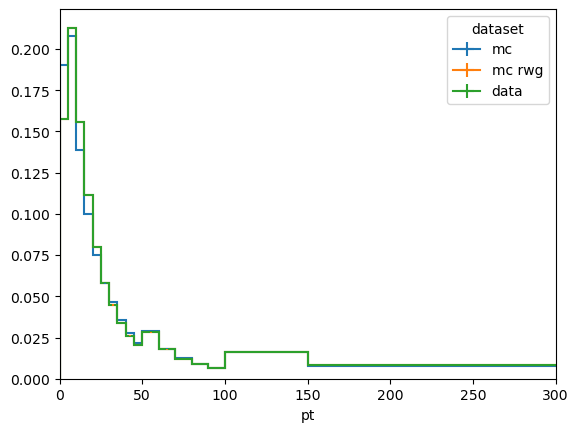

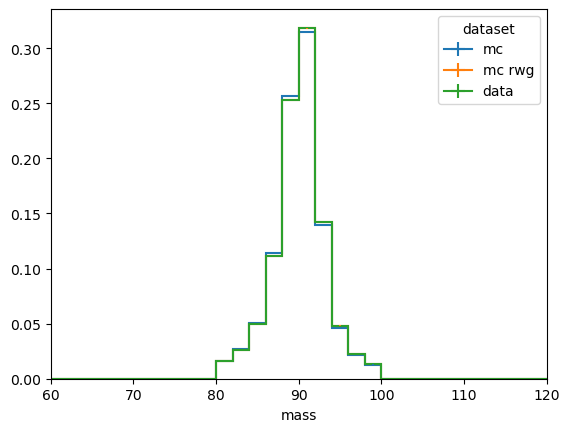

In [24]:
fig, ax = plt.subplots()
mc_pt = dists["mc", :, :].project("pt")
data_pt = dists["data", :, :].project("pt")
mc_rwg_pt = dists["mc reweighted", :, :].project("pt")
mc_pt.plot1d(ax=ax, label="mc")
mc_rwg_pt.plot1d(ax=ax, label="mc rwg")
data_pt.plot1d(ax=ax, label="data")
ax.legend(title="dataset")
ax.set_xlim(0, 300)

fig, ax = plt.subplots()
mc_mass = dists["mc", :, :].project("mass")
data_mass = dists["data", :, :].project("mass")
mc_rwg_mass = dists["mc reweighted", :, :].project("mass")
mc_mass.plot1d(ax=ax, label="mc")
mc_rwg_mass.plot1d(ax=ax, label="mc rwg")
data_mass.plot1d(ax=ax, label="data")
ax.legend(title="dataset")
ax.set_xlim(60, 120)


In [25]:
cset = cs.CorrectionSet(
    schema_version=2,
    description="Z_pt_mass reweight mc to data",
    corrections=[
        mc_to_data,
    ],
)

with open("Zpt_mass_reweight.json", "w") as fout:
    fout.write(cset.json(exclude_unset=True))

import gzip
with gzip.open("Zpt_mass_reweight.json.gz", "wt") as fout:
    fout.write(cset.json(exclude_unset=True))

['data', 'MC', 'MC_rwg']


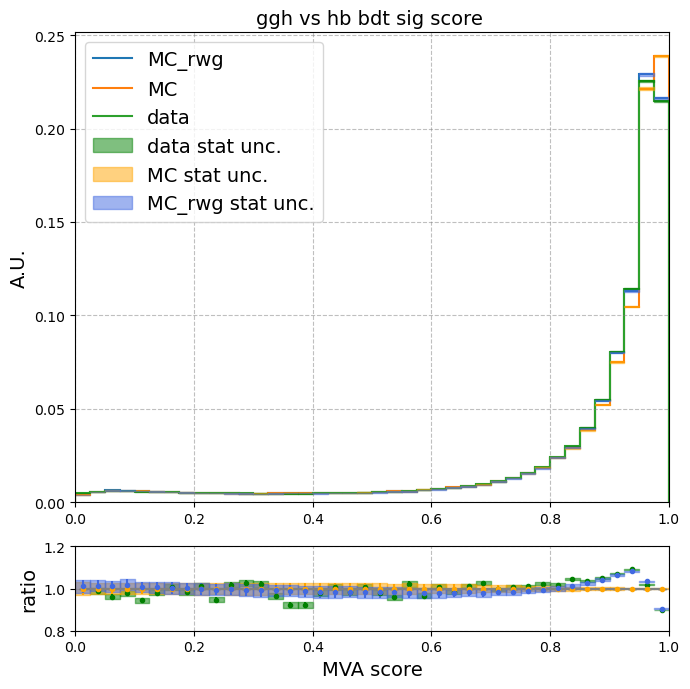

In [26]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "ggh_vs_hb_bdt_sig_score"
min_ = 0.
max_ = 1
nbins = 40

labels = ["data", "MC"]
labels.append("MC_rwg")
print(labels)
LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('MVA score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

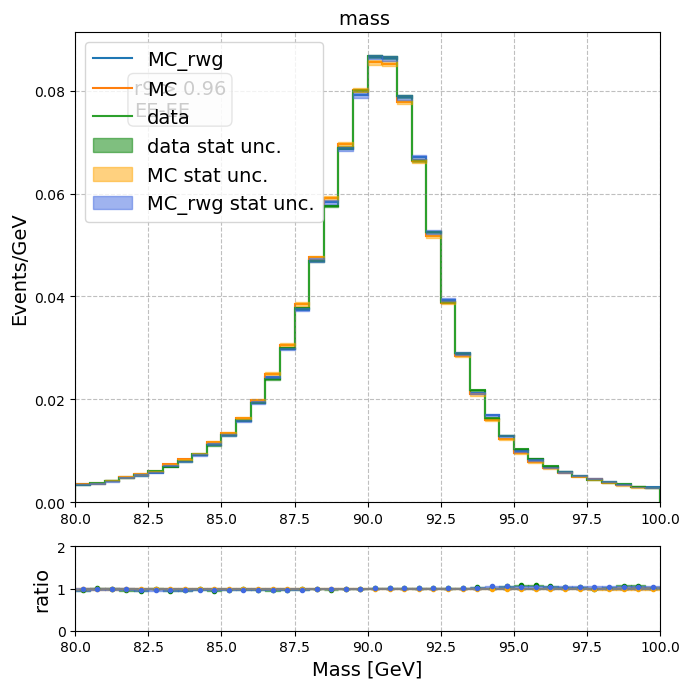

In [27]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "mass"
min_ = 80.
max_ = 100
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('Events/GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.,2.])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)

weight_box = '\n'.join((
    r'r9 > 0.96',
    r'EE-EE',
    ))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.5)
# place a text box in upper left in axes coords
ax0.text(0.1, 0.9, weight_box, transform=ax0.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

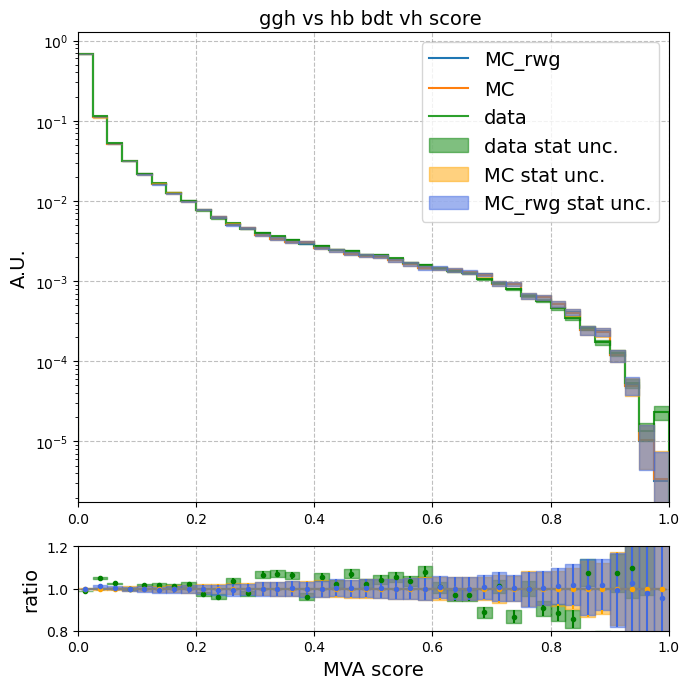

In [28]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "ggh_vs_hb_bdt_vh_score"
min_ = 0.
max_ = 1
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax0.set_yscale('log')
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('MVA score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

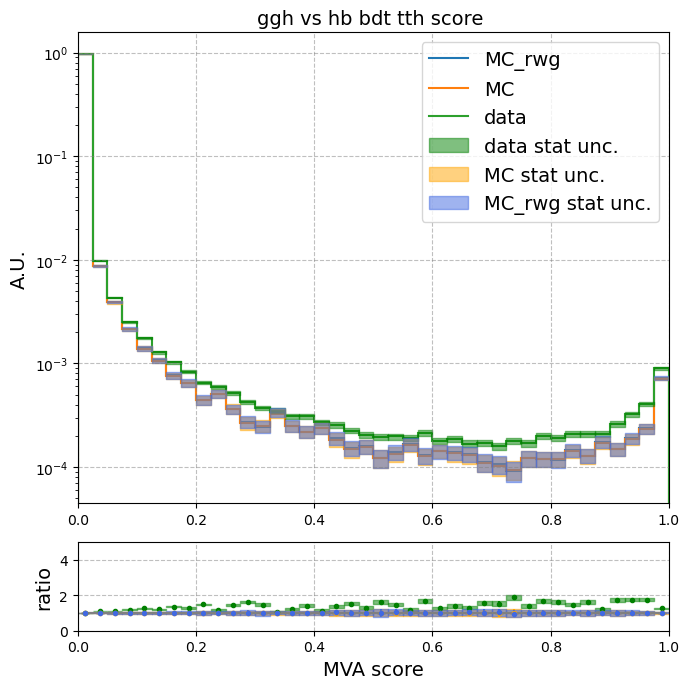

<Figure size 640x480 with 0 Axes>

In [29]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "ggh_vs_hb_bdt_tth_score"
min_ = 0.
max_ = 1
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.,5])
ax0.set_yscale('log')
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('MVA score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}.png")

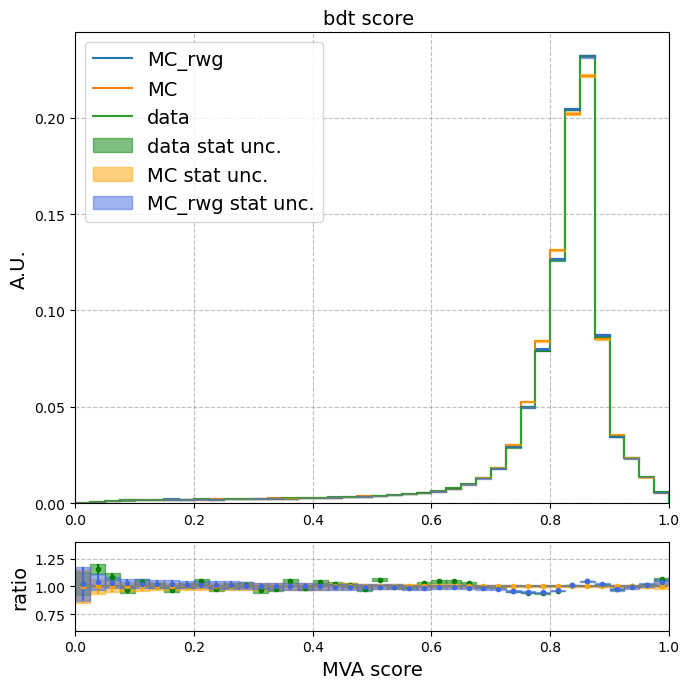

In [30]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "bdt_score"
min_ = 0.
max_ = 1
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.6,1.4])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('MVA score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

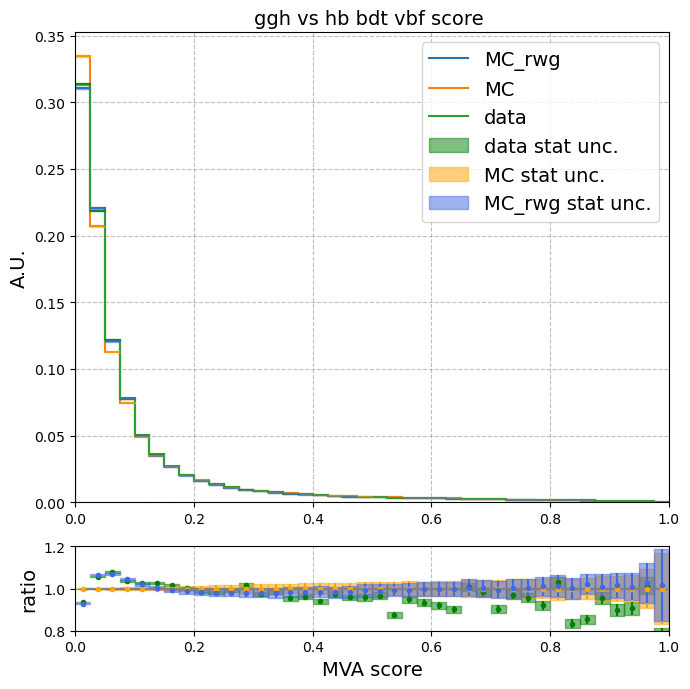

In [31]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "ggh_vs_hb_bdt_vbf_score"
min_ = 0.
max_ = 1
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('MVA score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

In [32]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "pt"
min_ = 0.
max_ = 250
nbins = 125

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Pt [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

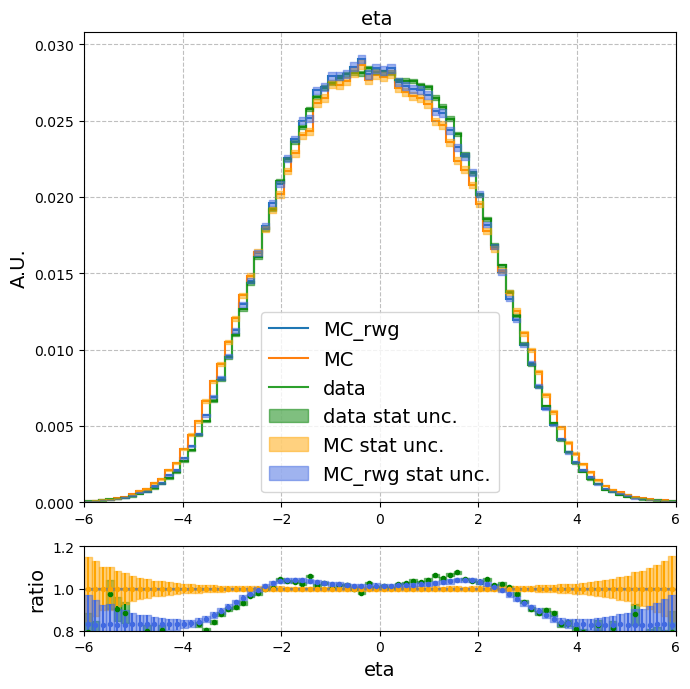

In [33]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "eta"
min_ = -6.
max_ = 6
nbins = 80

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")


ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('eta', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

/tmp/ipykernel_16434/2117167557.py:101: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["MC"],
/tmp/ipykernel_16434/2117167557.py:105: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_16434/2117167557.py:108: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")


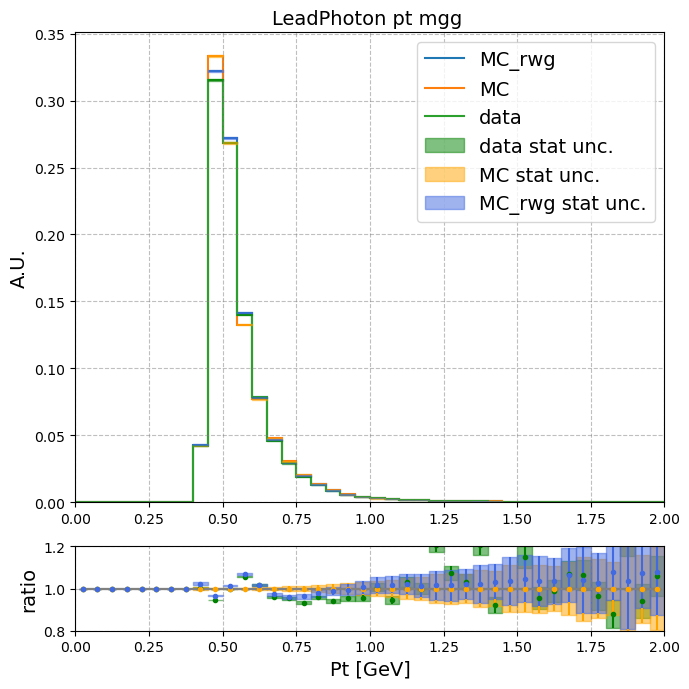

In [34]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "LeadPhoton_pt_mgg"
min_ = 0.
max_ = 2
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")


ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Pt [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

/tmp/ipykernel_16434/655864616.py:101: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["MC"],
/tmp/ipykernel_16434/655864616.py:105: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_16434/655864616.py:108: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")


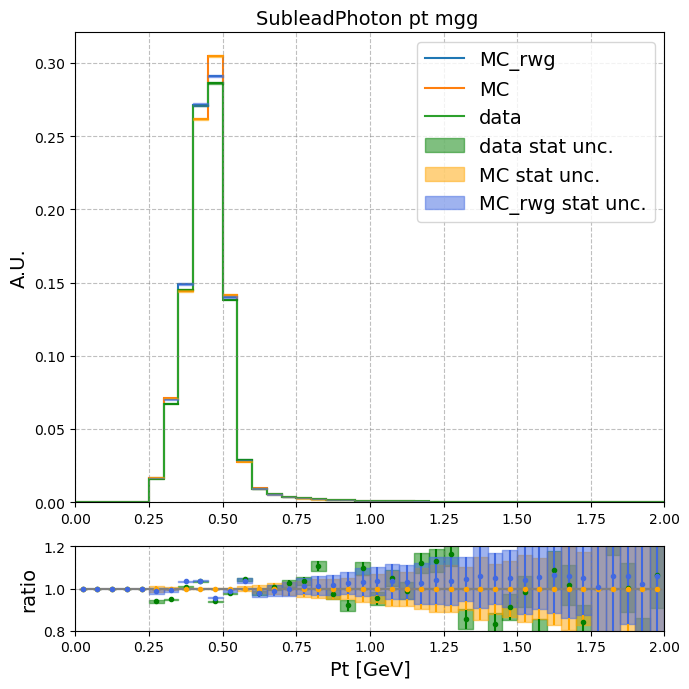

In [35]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "SubleadPhoton_pt_mgg"
min_ = 0.
max_ = 2
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Pt [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

/tmp/ipykernel_16434/3690339134.py:101: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["MC"],
/tmp/ipykernel_16434/3690339134.py:105: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_16434/3690339134.py:108: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")


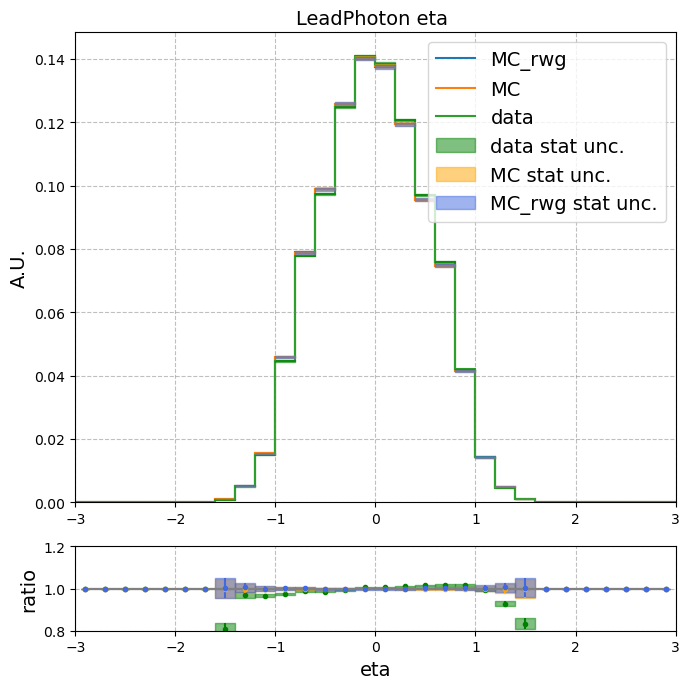

In [36]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "LeadPhoton_eta"
min_ = -3.
max_ = 3
nbins = 30

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('eta', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

/tmp/ipykernel_16434/1902262264.py:101: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["MC"],
/tmp/ipykernel_16434/1902262264.py:105: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_16434/1902262264.py:108: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")
/tmp/ipykernel_16434/1902262264.py:109: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bin

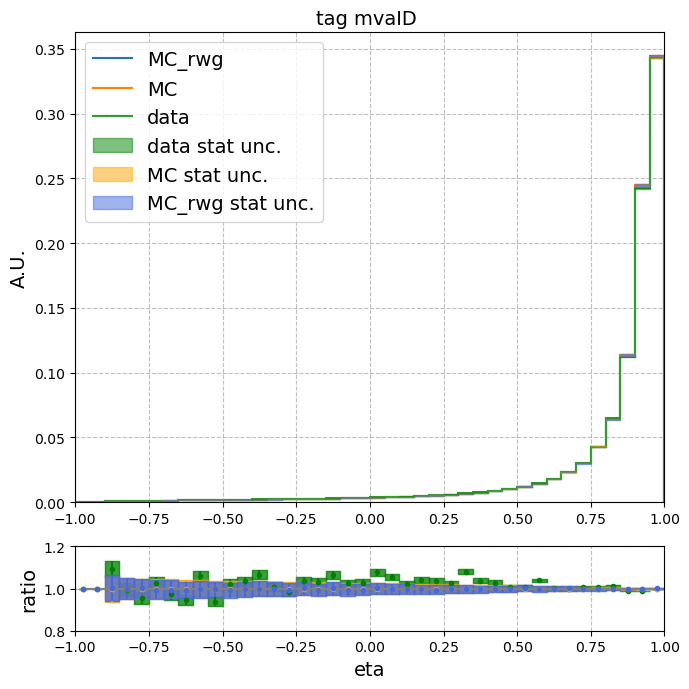

In [37]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "tag_mvaID"
min_ = -1.
max_ = 1
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('eta', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

/tmp/ipykernel_16434/2460366636.py:101: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["MC"],
/tmp/ipykernel_16434/2460366636.py:105: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_16434/2460366636.py:108: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")


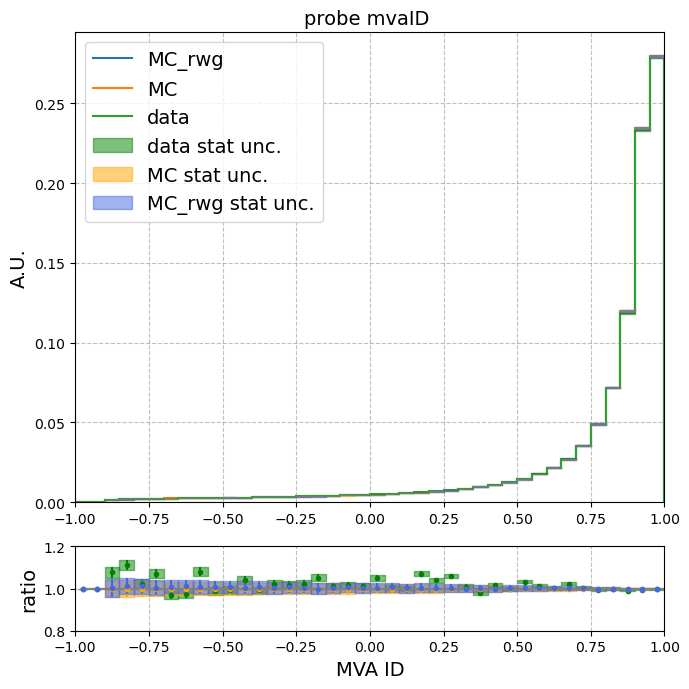

In [38]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "probe_mvaID"
min_ = -1.
max_ = 1
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('MVA ID', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

In [39]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "probe_pt"
min_ = 20.
max_ = 160
nbins = 70

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('pt', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

/tmp/ipykernel_16434/3468192483.py:101: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["MC"],
/tmp/ipykernel_16434/3468192483.py:105: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_16434/3468192483.py:108: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")


/tmp/ipykernel_16434/2023596966.py:101: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["MC"],
/tmp/ipykernel_16434/2023596966.py:105: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_16434/2023596966.py:108: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")


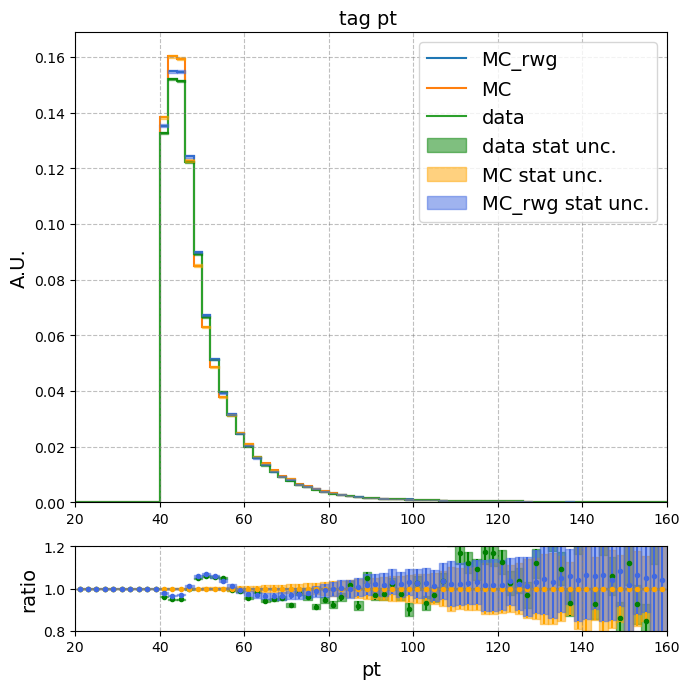

In [40]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "tag_pt"
min_ = 20.
max_ = 160
nbins = 70

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('pt', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

In [41]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "SubleadPhoton_eta"
min_ = -3.
max_ = 3
nbins = 30

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('eta', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

/tmp/ipykernel_16434/156071328.py:101: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["MC"],
/tmp/ipykernel_16434/156071328.py:105: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_16434/156071328.py:108: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")


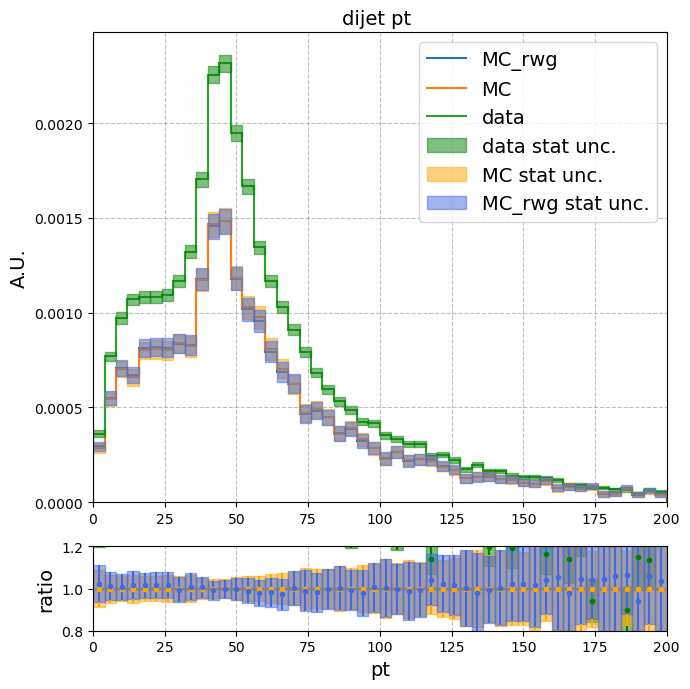

In [42]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "dijet_pt"
min_ = 0.
max_ = 200
nbins = 50


LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('pt', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)

fig.tight_layout()

fig.savefig(f"plots/{var}.png")

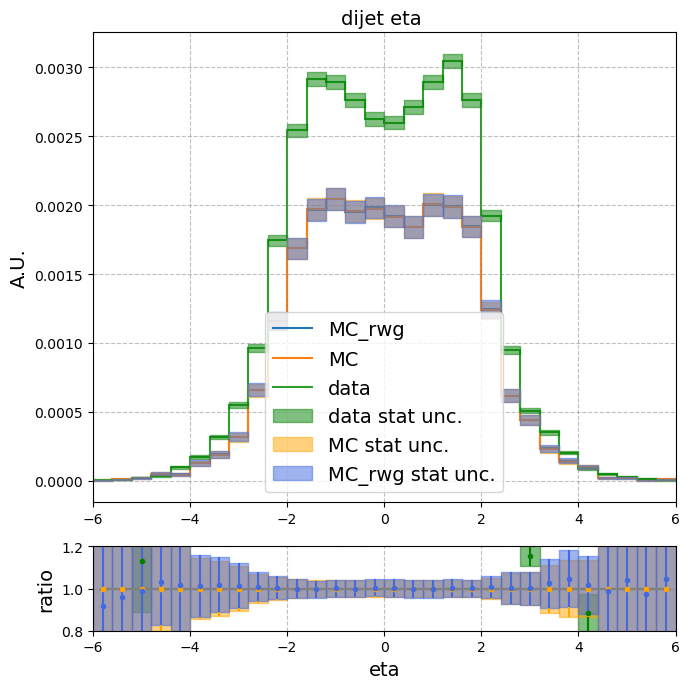

In [43]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "dijet_eta"
min_ = -6.
max_ = 6
nbins = 30


LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('eta', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

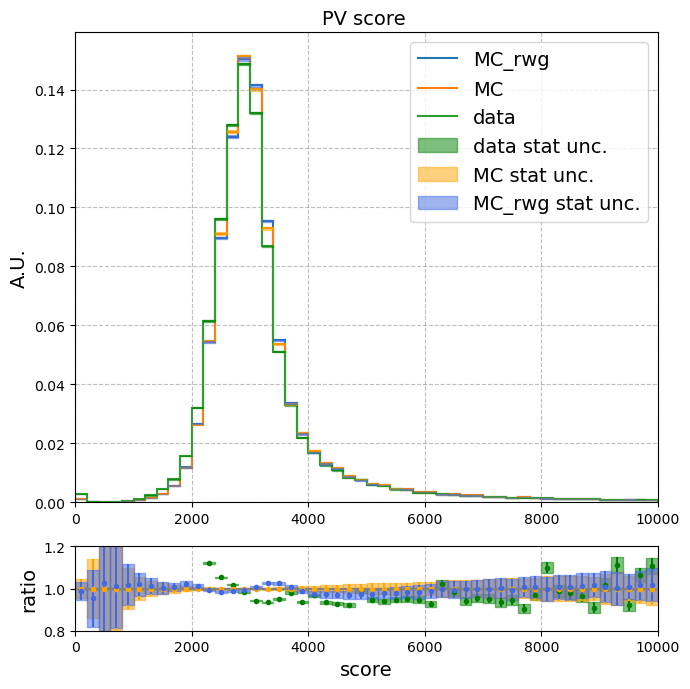

In [44]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "PV_score"
min_ = 0.
max_ = 10000
nbins = 50
LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

/tmp/ipykernel_16434/1044131603.py:101: RuntimeWarning: divide by zero encountered in divide
  mc["bins"][sample] / mc["bins"]["MC"],
/tmp/ipykernel_16434/1044131603.py:101: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["MC"],
/tmp/ipykernel_16434/1044131603.py:105: RuntimeWarning: divide by zero encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_16434/1044131603.py:105: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)
/work/bevila_t/MINICONDA3/envs/dev-higgs-dna/lib/python3.10/site-packages/matplotlib/axes/_axes.py:3680: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.vstack([-(1 - lolims), 1 - uplims]) * err
/tmp/ipykernel_1643

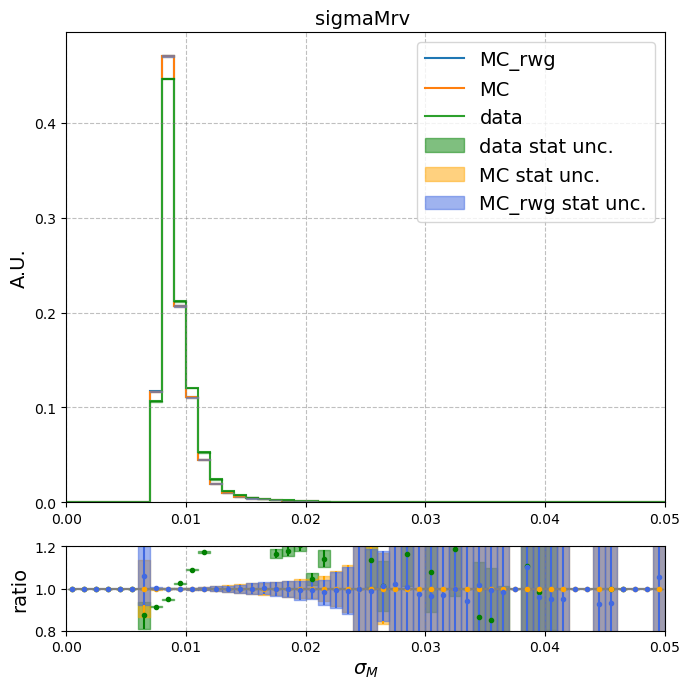

In [45]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "sigmaMrv"
min_ = 0.
max_ = 0.05
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('$\sigma_M$', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "sigmaMwv"
min_ = 0.
max_ = 0.03
nbins = 30
LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
fig.tight_layout()

fig.savefig(f"plots/{var}.png")

# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "first_jet_pt"
min_ = 0.
max_ = 250
nbins = 50
LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

wgt = "weight"
wgt = "weight_norm"
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    norm[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
norm["tot"] = sum
norm["MC_rwg"] = ak.sum(fileset[sample][wgt])

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt]*(mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"]*mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")
# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])/norm[sample]

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Pt [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_dist_data_mc_{year}.pdf")

# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "first_jet_eta"
min_ = -3.
max_ = 3
nbins = 30
LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

wgt = "weight"
wgt = "weight_norm"
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    norm[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
norm["tot"] = sum
norm["MC_rwg"] = ak.sum(fileset[sample][wgt])

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt]*(mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"]*mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")
# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])/norm[sample]

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('eta', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_dist_data_mc_{year}.pdf")

/tmp/ipykernel_16434/3179555903.py:100: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["MC"],
/tmp/ipykernel_16434/3179555903.py:104: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_16434/3179555903.py:107: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")


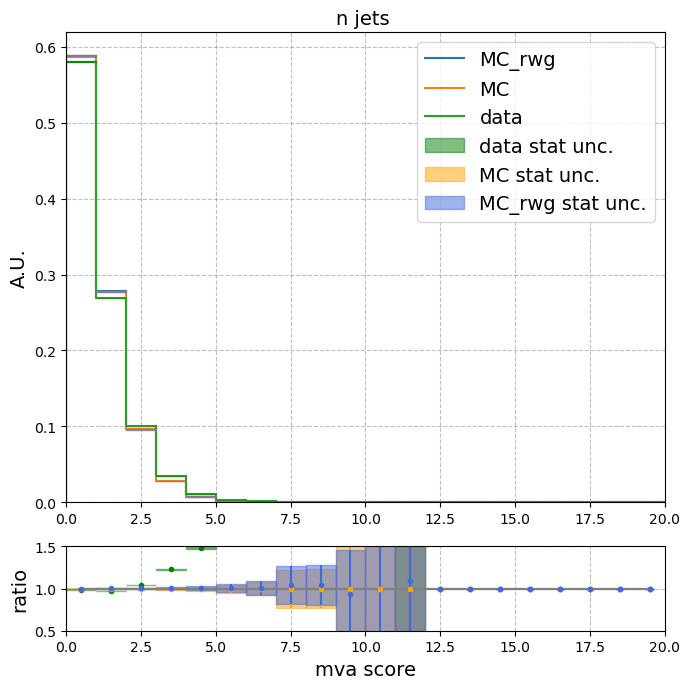

<Figure size 640x480 with 0 Axes>

In [46]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "n_jets"
min_ = 0.
max_ = 20
nbins = 20

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.5,1.5])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mva score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_dist_data_mc_{year}.pdf")

/tmp/ipykernel_16434/1442864649.py:101: RuntimeWarning: divide by zero encountered in divide
  mc["bins"][sample] / mc["bins"]["MC"],
/tmp/ipykernel_16434/1442864649.py:101: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["MC"],
/tmp/ipykernel_16434/1442864649.py:105: RuntimeWarning: divide by zero encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_16434/1442864649.py:105: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)
/work/bevila_t/MINICONDA3/envs/dev-higgs-dna/lib/python3.10/site-packages/matplotlib/axes/_axes.py:3680: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.vstack([-(1 - lolims), 1 - uplims]) * err
/tmp/ipykernel_1643

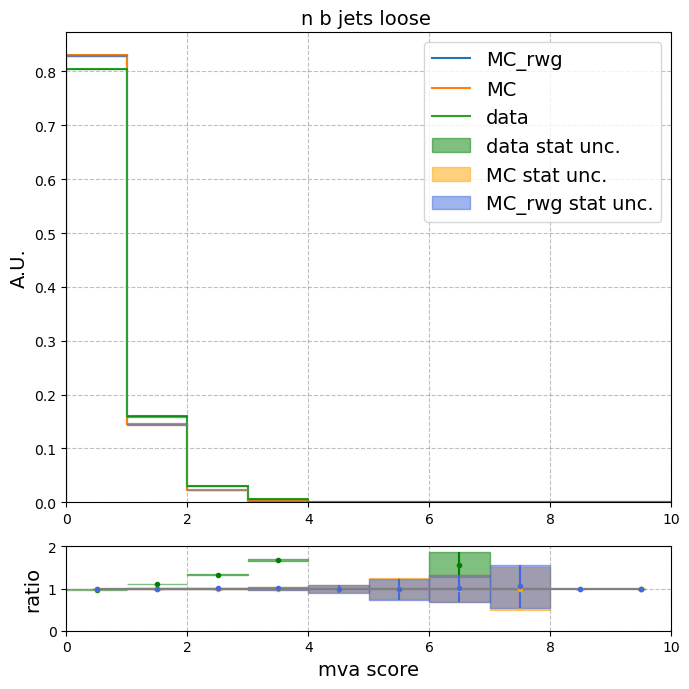

<Figure size 640x480 with 0 Axes>

In [47]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "n_b_jets_loose"
min_ = 0.
max_ = 10
nbins = 10

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mva score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_dist_data_mc_{year}.pdf")

/tmp/ipykernel_16434/1874546429.py:101: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["MC"],
/tmp/ipykernel_16434/1874546429.py:105: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_16434/1874546429.py:108: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")


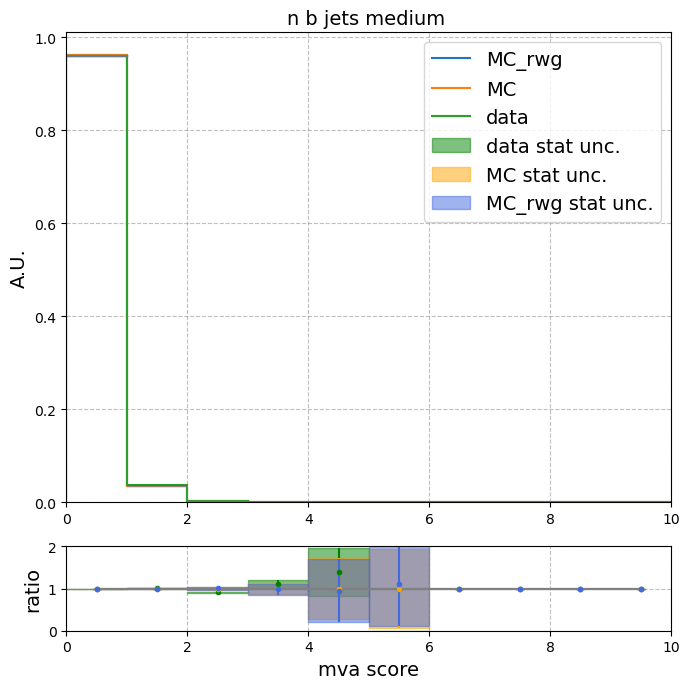

<Figure size 640x480 with 0 Axes>

In [48]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "n_b_jets_medium"
min_ = 0.
max_ = 10
nbins = 10

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mva score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_dist_data_mc_{year}.pdf")

# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "MET_pt"
min_ = 0.
max_ = 200
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

wgt = "weight"
wgt = "weight_norm"
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    norm[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
norm["tot"] = sum
norm["MC_rwg"] = ak.sum(fileset[sample][wgt])

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt]*(mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"]*mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")
# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])/norm[sample]

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mva score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_dist_data_mc_{year}.pdf")

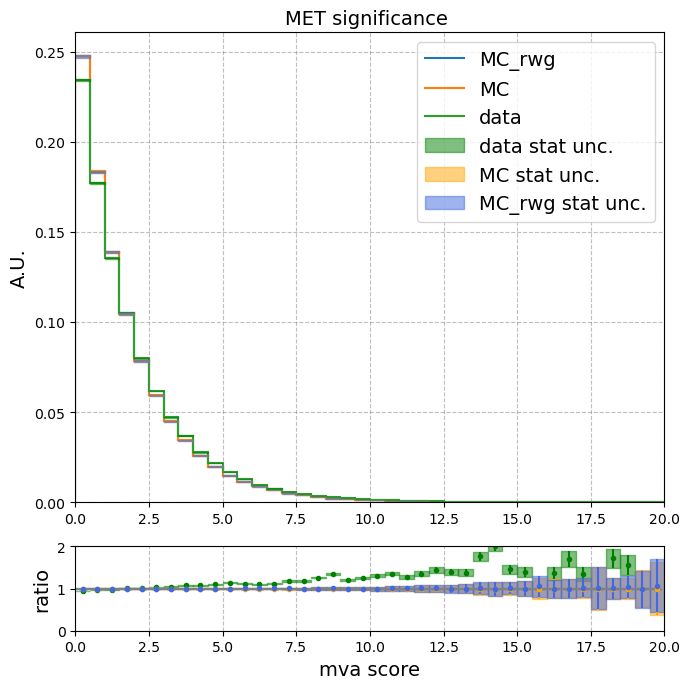

<Figure size 640x480 with 0 Axes>

In [49]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "MET_significance"
min_ = 0.
max_ = 20
nbins = 40


LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mva score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_dist_data_mc_{year}.pdf")

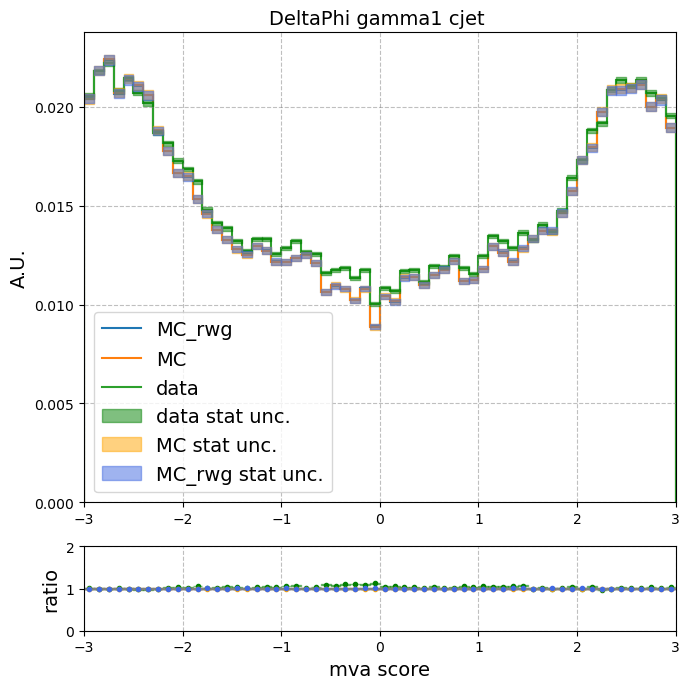

<Figure size 640x480 with 0 Axes>

In [ ]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "DeltaPhi_gamma1_cjet"
min_ = -3.
max_ = 3
nbins = 60


LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mva score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_dist_data_mc_{year}.pdf")

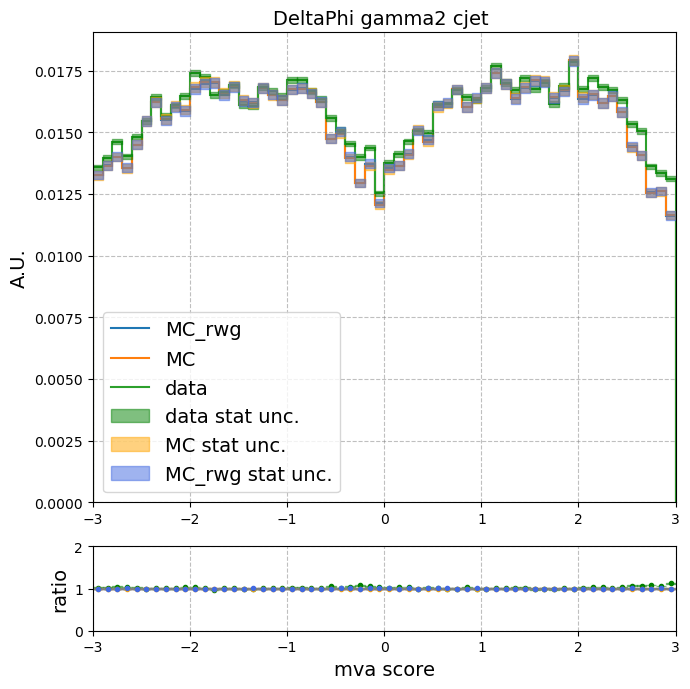

<Figure size 640x480 with 0 Axes>

In [ ]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "DeltaPhi_gamma2_cjet"
min_ = -3.
max_ = 3
nbins = 60


LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mva score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_dist_data_mc_{year}.pdf")

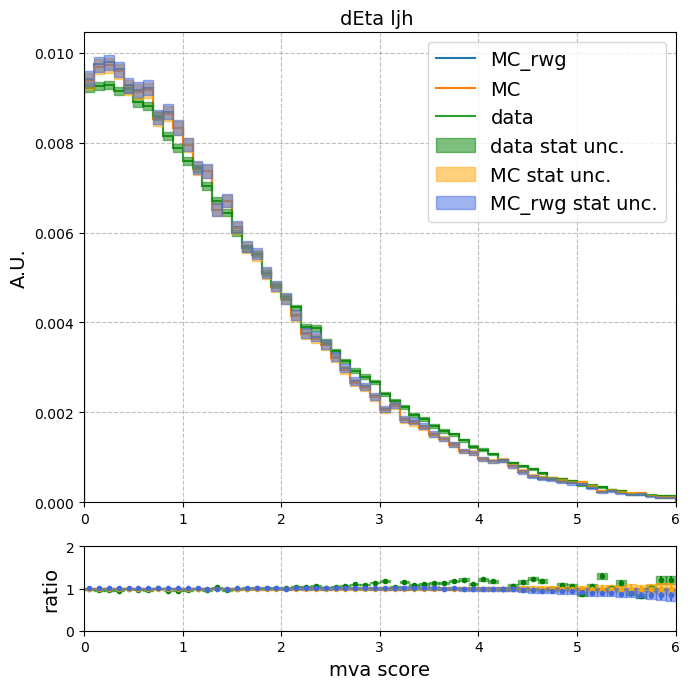

<Figure size 640x480 with 0 Axes>

In [ ]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "dEta_ljh"
min_ = 0.
max_ = 6.
nbins = 60


LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mva score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_dist_data_mc_{year}.pdf")

# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "lj_ptoM"
min_ = 0.
max_ = 20.
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

wgt = "weight"
wgt = "weight_norm"
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    norm[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
norm["tot"] = sum
norm["MC_rwg"] = ak.sum(fileset[sample][wgt])

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt]*(mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"]*mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")
# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])/norm[sample]

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mva score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_dist_data_mc_{year}.pdf")

# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "first_muon_pt"
min_ = 0.
max_ = 200.
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

wgt = "weight"
wgt = "weight_norm"
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    norm[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
norm["tot"] = sum
norm["MC_rwg"] = ak.sum(fileset[sample][wgt])

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt]*(mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"]*mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")
# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])/norm[sample]

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mva score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_dist_data_mc_{year}.pdf")

# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "first_electron_pt"
min_ = 0.
max_ = 200.
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

wgt = "weight"
wgt = "weight_norm"
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    norm[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
norm["tot"] = sum
norm["MC_rwg"] = ak.sum(fileset[sample][wgt])

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt]*(mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"]*mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")
# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])/norm[sample]

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mva score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_dist_data_mc_{year}.pdf")

# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "second_jet_pt"
min_ = 0.
max_ = 200.
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

wgt = "weight"
wgt = "weight_norm"
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    norm[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
norm["tot"] = sum
norm["MC_rwg"] = ak.sum(fileset[sample][wgt])

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt]*(mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"]*mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")
# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])/norm[sample]

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mva score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_dist_data_mc_{year}.pdf")

# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "third_jet_pt"
min_ = 0.
max_ = 200.
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

wgt = "weight"
wgt = "weight_norm"
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    norm[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
norm["tot"] = sum
norm["MC_rwg"] = ak.sum(fileset[sample][wgt])

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt]*(mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"]*mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")
# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])/norm[sample]

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mva score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_dist_data_mc_{year}.pdf")

/tmp/ipykernel_58107/996586299.py:102: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["MC"],
/tmp/ipykernel_58107/996586299.py:106: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_58107/996586299.py:109: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")


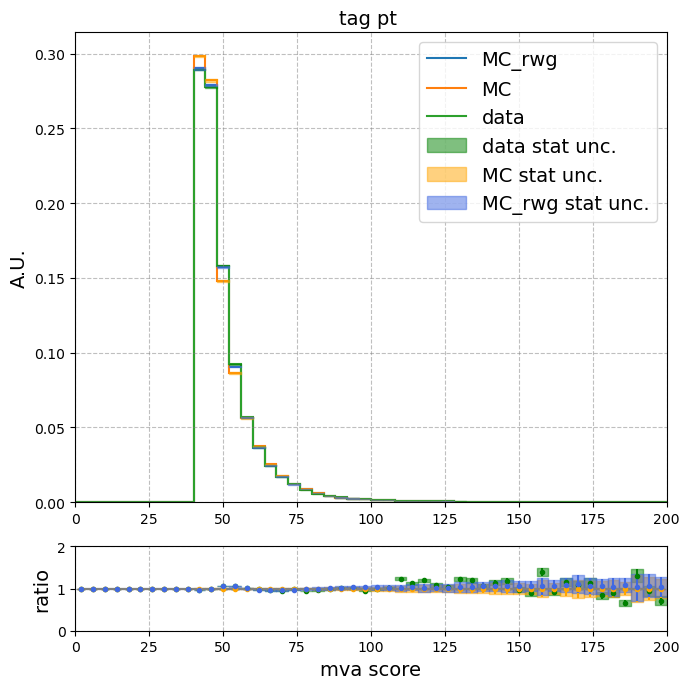

<Figure size 640x480 with 0 Axes>

In [ ]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "tag_pt"
min_ = 0.
max_ = 200
nbins = 50


LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mva score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_dist_data_mc_{year}.pdf")

/tmp/ipykernel_58107/2182116082.py:106: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["MC"],
/tmp/ipykernel_58107/2182116082.py:110: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_58107/2182116082.py:113: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")


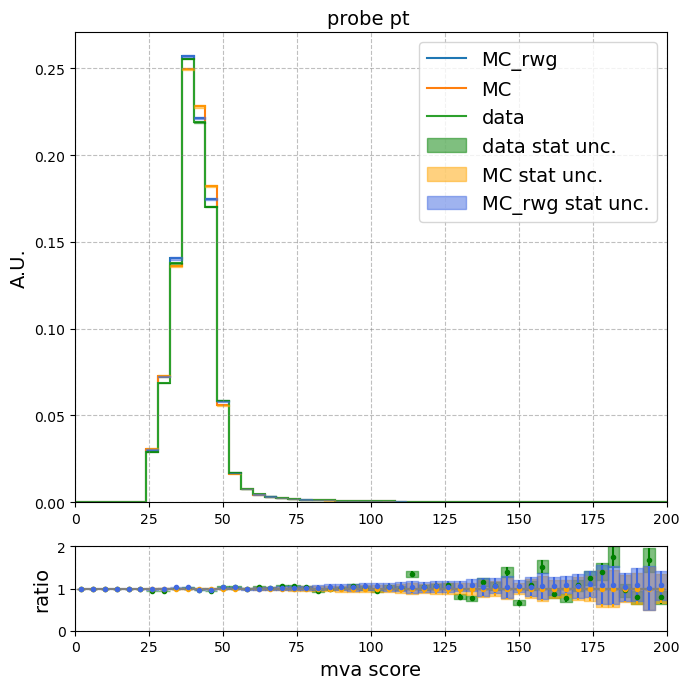

<Figure size 640x480 with 0 Axes>

In [ ]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "probe_pt"
min_ = 0.
max_ = 200
nbins = 50

title = ""
for x in var.split("_"):
    title += f"{x} "


LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(labels, name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

for sample in ["data", "MC"]:
    if "data" in sample.lower():
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt] * (mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"])), c=sample+"_rwg")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]), c=sample+"_rwg")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack["MC_rwg"] =  h_stack["MC_rwg"] / (integrals["MC_rwg"])
h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2
h_stack_err["MC_rwg"] =  h_stack_err["MC_rwg"] / (integrals["MC_rwg"]) ** 2
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in labels:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in labels:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["green", "orange", "royalblue"]
for j, sample in enumerate(labels):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(labels):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mva score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_dist_data_mc_{year}.pdf")

In [ ]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "mass"
min_ = 60.
max_ = 120
nbins = 80

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
    
LeadPhoton_et_cax = hist.axis.StrCategory(["data", "MC"], name="c")
LeadPhoton_et_cax_split = hist.axis.StrCategory(["DY", "ttH", "TTTo2L2Nu"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_split = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_split)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum_ = 0.
title = ""
for x in var.split("_"):
    title += f"{x} "

wgt = "weight"
wgt = "weight_norm"
for sample in ["MC", "data"]:
    if sample == "data":
        sum_ += len(fileset[sample])
        integrals[sample] = len(fileset[sample])
    else:
        sum_ += ak.sum(fileset[sample][wgt])
        integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum_

for sample in ["MC", "data"]:
    if sample == "data":
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c=sample)
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c=sample)
    else:
        full_hist.fill(ax = fileset[sample][var], weight = fileset[sample][wgt], c="MC")
        full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["square_weight"], c="MC")
        
        full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 1], weight = fileset[sample][wgt][fileset[sample]["proc_id"] == 1], c="DY")
        full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 2], weight = fileset[sample][wgt][fileset[sample]["proc_id"] == 2], c="ttH")
        full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 3], weight = fileset[sample][wgt][fileset[sample]["proc_id"] == 3], c="TTTo2L2Nu")

h_stack = full_hist.stack("c")
h_stack_split = full_hist_split.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2

h_stack_split["DY"] =  h_stack_split["DY"] / integrals["MC"]
h_stack_split["ttH"] =  h_stack_split["ttH"] / integrals["MC"]
h_stack_split["TTTo2L2Nu"] =  h_stack_split["TTTo2L2Nu"] / integrals["MC"]

h_stack["data"] =  h_stack["data"] / integrals["data"]
h_stack_err["data"] =  h_stack_err["data"] / integrals["data"] ** 2

if single_plot:
    h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
else:
    h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
    h_stack_split[::-1].plot(ax=ax0, stack=True, histtype="step", color=["red", "blue", "green"])
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in ["data", "MC"]: # [*fileset]:
    mc["bins"][sample], mc["edges"][sample] = h_stack[sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(h_stack_err[sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in ["data", "MC"]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# plot shaded area for MC errors
colours = ["orange", "royalblue"]
for j, sample in enumerate(["data", "MC"]):
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

for j, sample in enumerate(["data", "MC"]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["MC"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="mc")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["MC"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["MC"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["MC"][i], ydn[sample][i]/mc["bins"]["MC"][i]], [yup[sample][i]/mc["bins"]["MC"][i], yup[sample][i]/mc["bins"]["MC"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="MC stat unc.")

ax1.set_ylim([0.75,1.25])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()

weight_box = '\n'.join((
    r'r9 > 0.96',
    r'EB-EB',
    ))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.5)
# place a text box in upper left in axes coords
ax0.text(0.1, 0.9, weight_box, transform=ax0.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    
plt.plot()
plt.show()
plt.savefig(f"plots/{var}_{year}.pdf")

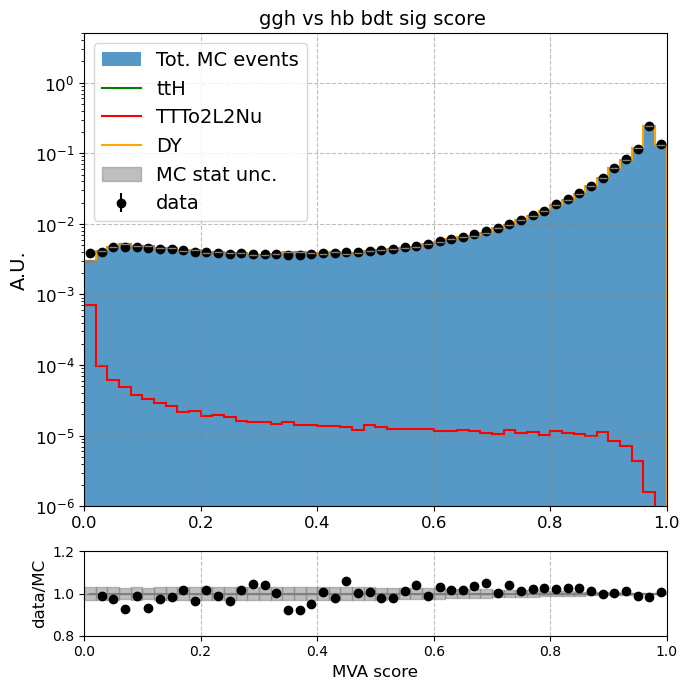

In [ ]:
#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "ggh_vs_hb_bdt_sig_score"
min_ = 0.
max_ = 1
nbins = 50
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
LeadPhoton_et_cax_split = hist.axis.StrCategory(["DY", "TTTo2L2Nu", "ttH"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_split = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_split)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

fileset["MC"]["weight_norm_corr"] = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]))
full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"])), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 1], weight = fileset[sample]["weight_norm_corr"][fileset[sample]["proc_id"] == 1], c="DY")
full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 2], weight = fileset[sample]["weight_norm_corr"][fileset[sample]["proc_id"] == 2], c="ttH")
full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 3], weight = fileset[sample]["weight_norm_corr"][fileset[sample]["proc_id"] == 3], c="TTTo2L2Nu")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")
h_stack_split = full_hist_split.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2

h_stack_split["DY"] =  h_stack_split["DY"] / integrals["MC"]
h_stack_split["ttH"] =  h_stack_split["ttH"] / integrals["MC"]
h_stack_split["TTTo2L2Nu"] =  h_stack_split["TTTo2L2Nu"] / integrals["MC"]

if single_plot:
    h_stack[::-1].plot(ax=ax0, stack=False, histtype="fill", alpha=0.75, label="Tot. MC events")
else:
    h_stack[::-1].plot(ax=ax0, stack=False, histtype="fill", alpha=0.75, label="Tot. MC events")
    h_stack_split[::-1].plot(ax=ax0, stack=True, histtype="step", color=["green", "red", "orange"])

#h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt] / integrals["data"])
h_data_err.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"] / integrals["data"] ** 2)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - 0.01, x + 0.01], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([0,1])
ax0.set_xlim([0,1])
ax0.set_ylim([1e-6,5])
ax0.set_yscale('log')
ax1.set_xlabel('MVA score', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

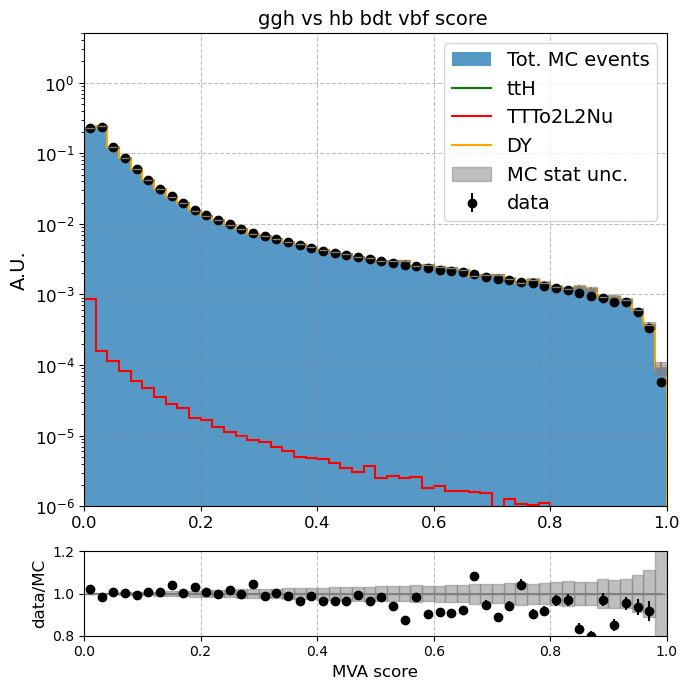

In [ ]:
#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "ggh_vs_hb_bdt_vbf_score"
min_ = 0.
max_ = 1
nbins = 50
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
LeadPhoton_et_cax_split = hist.axis.StrCategory(["DY", "TTTo2L2Nu", "ttH"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_split = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_split)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

fileset["MC"]["weight_norm_corr"] = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]))
full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"])), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 1], weight = fileset[sample]["weight_norm_corr"][fileset[sample]["proc_id"] == 1], c="DY")
full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 2], weight = fileset[sample]["weight_norm_corr"][fileset[sample]["proc_id"] == 2], c="ttH")
full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 3], weight = fileset[sample]["weight_norm_corr"][fileset[sample]["proc_id"] == 3], c="TTTo2L2Nu")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")
h_stack_split = full_hist_split.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2

h_stack_split["DY"] =  h_stack_split["DY"] / integrals["MC"]
h_stack_split["ttH"] =  h_stack_split["ttH"] / integrals["MC"]
h_stack_split["TTTo2L2Nu"] =  h_stack_split["TTTo2L2Nu"] / integrals["MC"]

if single_plot:
    h_stack[::-1].plot(ax=ax0, stack=False, histtype="fill", alpha=0.75, label="Tot. MC events")
else:
    h_stack[::-1].plot(ax=ax0, stack=False, histtype="fill", alpha=0.75, label="Tot. MC events")
    h_stack_split[::-1].plot(ax=ax0, stack=True, histtype="step", color=["green", "red", "orange"])

#h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt] / integrals["data"])
h_data_err.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"] / integrals["data"] ** 2)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - 0.01, x + 0.01], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim([0,1])
ax0.set_xlim([0,1])
ax0.set_ylim([1e-6,5])
ax0.set_yscale('log')
ax1.set_xlabel('MVA score', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

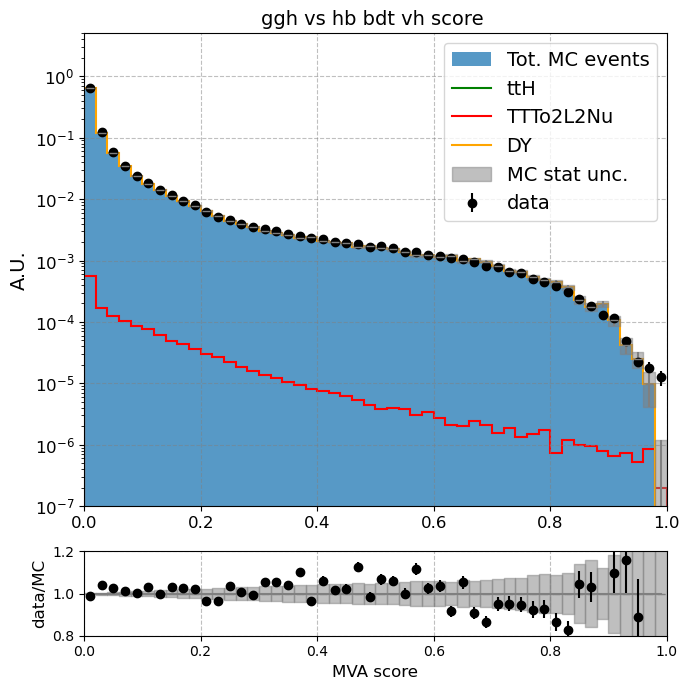

In [ ]:
#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "ggh_vs_hb_bdt_vh_score"
min_ = 0.
max_ = 1
nbins = 50
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
LeadPhoton_et_cax_split = hist.axis.StrCategory(["DY", "TTTo2L2Nu", "ttH"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_split = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_split)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

fileset["MC"]["weight_norm_corr"] = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]))
full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"])), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 1], weight = fileset[sample]["weight_norm_corr"][fileset[sample]["proc_id"] == 1], c="DY")
full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 2], weight = fileset[sample]["weight_norm_corr"][fileset[sample]["proc_id"] == 2], c="ttH")
full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 3], weight = fileset[sample]["weight_norm_corr"][fileset[sample]["proc_id"] == 3], c="TTTo2L2Nu")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")
h_stack_split = full_hist_split.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2

h_stack_split["DY"] =  h_stack_split["DY"] / integrals["MC"]
h_stack_split["ttH"] =  h_stack_split["ttH"] / integrals["MC"]
h_stack_split["TTTo2L2Nu"] =  h_stack_split["TTTo2L2Nu"] / integrals["MC"]

if single_plot:
    h_stack[::-1].plot(ax=ax0, stack=False, histtype="fill", alpha=0.75, label="Tot. MC events")
else:
    h_stack[::-1].plot(ax=ax0, stack=False, histtype="fill", alpha=0.75, label="Tot. MC events")
    h_stack_split[::-1].plot(ax=ax0, stack=True, histtype="step", color=["green", "red", "orange"])

#h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt] / integrals["data"])
h_data_err.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"] / integrals["data"] ** 2)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/abs(mc["bins"]["tot"]), color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - 0.01, x + 0.01], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax0.set_ylim([1e-7,5])
ax1.set_xlim([0,1])
ax0.set_xlim([0,1])
ax0.set_yscale('log')
ax1.set_xlabel('MVA score', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

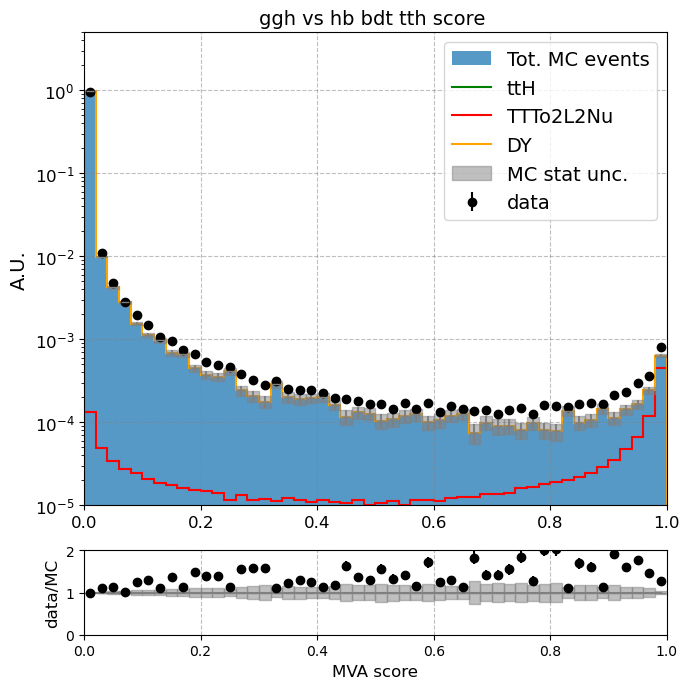

In [ ]:
#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "ggh_vs_hb_bdt_tth_score"
min_ = 0.
max_ = 1
nbins = 50
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
LeadPhoton_et_cax_split = hist.axis.StrCategory(["DY", "TTTo2L2Nu", "ttH"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_split = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_split)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

fileset["MC"]["weight_norm_corr"] = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]))
full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"])), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 1], weight = fileset[sample]["weight_norm_corr"][fileset[sample]["proc_id"] == 1], c="DY")
full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 2], weight = fileset[sample]["weight_norm_corr"][fileset[sample]["proc_id"] == 2], c="ttH")
full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 3], weight = fileset[sample]["weight_norm_corr"][fileset[sample]["proc_id"] == 3], c="TTTo2L2Nu")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")
h_stack_split = full_hist_split.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2

h_stack_split["DY"] =  h_stack_split["DY"] / integrals["MC"]
h_stack_split["ttH"] =  h_stack_split["ttH"] / integrals["MC"]
h_stack_split["TTTo2L2Nu"] =  h_stack_split["TTTo2L2Nu"] / integrals["MC"]

if single_plot:
    h_stack[::-1].plot(ax=ax0, stack=False, histtype="fill", alpha=0.75, label="Tot. MC events")
else:
    h_stack[::-1].plot(ax=ax0, stack=False, histtype="fill", alpha=0.75, label="Tot. MC events")
    h_stack_split[::-1].plot(ax=ax0, stack=True, histtype="step", color=["green", "red", "orange"])

#h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt] / integrals["data"])
h_data_err.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"] / integrals["data"] ** 2)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - 0.01, x + 0.01], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax0.set_ylim([1e-5,5])
ax1.set_ylim([0.,2])
ax1.set_xlim([0,1])
ax0.set_xlim([0,1])
ax0.set_yscale("log")
ax1.set_xlabel('MVA score', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

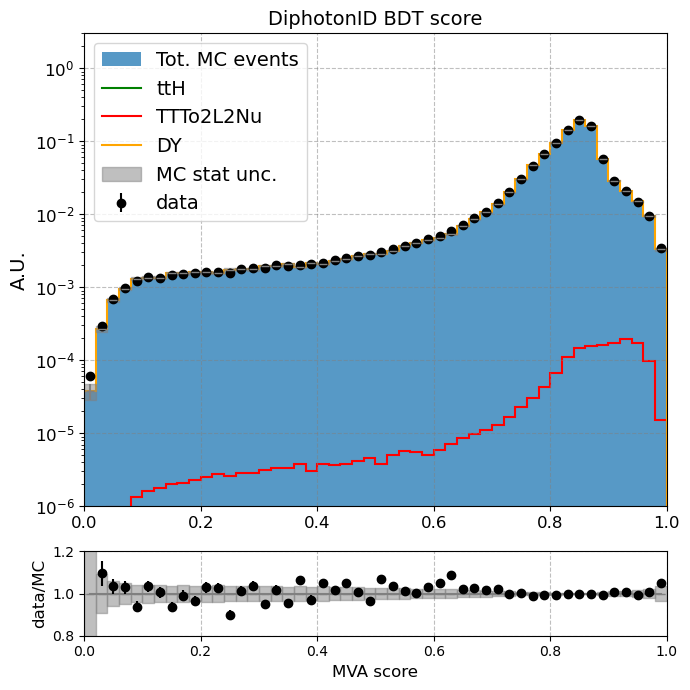

In [ ]:
#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "bdt_score"
min_ = 0.
max_ = 1
nbins = 50
half_bin = (max_ - min_) / (2 * nbins)

title = "DiphotonID BDT score"

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
LeadPhoton_et_cax_split = hist.axis.StrCategory(["DY", "TTTo2L2Nu", "ttH"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_split = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_split)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

fileset["MC"]["weight_norm_corr"] = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]))
full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"])), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 1], weight = fileset[sample]["weight_norm_corr"][fileset[sample]["proc_id"] == 1], c="DY")
full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 2], weight = fileset[sample]["weight_norm_corr"][fileset[sample]["proc_id"] == 2], c="ttH")
full_hist_split.fill(ax = fileset[sample][var][fileset[sample]["proc_id"] == 3], weight = fileset[sample]["weight_norm_corr"][fileset[sample]["proc_id"] == 3], c="TTTo2L2Nu")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")
h_stack_split = full_hist_split.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC"])
h_stack_err["MC"] =  h_stack_err["MC"] / (integrals["MC"]) ** 2

h_stack_split["DY"] =  h_stack_split["DY"] / integrals["MC"]
h_stack_split["ttH"] =  h_stack_split["ttH"] / integrals["MC"]
h_stack_split["TTTo2L2Nu"] =  h_stack_split["TTTo2L2Nu"] / integrals["MC"]

if single_plot:
    h_stack[::-1].plot(ax=ax0, stack=False, histtype="fill", alpha=0.75, label="Tot. MC events")
else:
    h_stack[::-1].plot(ax=ax0, stack=False, histtype="fill", alpha=0.75, label="Tot. MC events")
    h_stack_split[::-1].plot(ax=ax0, stack=True, histtype="step", color=["green", "red", "orange"])

#h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt] / integrals["data"])
h_data_err.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"] / integrals["data"] ** 2)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - 0.01, x + 0.01], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax0.set_ylim([1e-6,3])
ax1.set_ylim([0.8,1.2])
ax1.set_xlim([0,1])
ax0.set_xlim([0,1])
ax0.set_yscale("log")
ax1.set_xlabel('MVA score', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

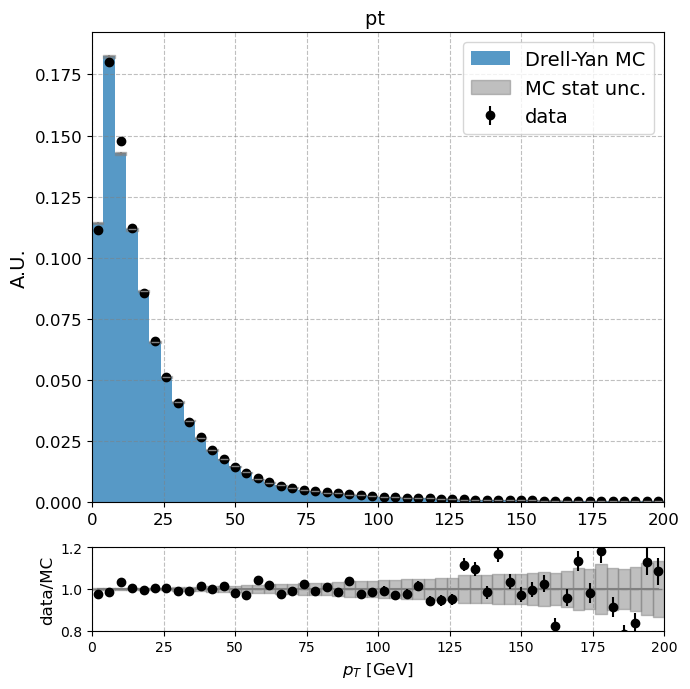

In [ ]:
#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "pt"
min_ = 0.
max_ = 200
nbins = 50
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"])), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC_rwg"])
h_stack_err["MC"] =  h_stack_err["MC"] / integrals["MC_rwg"] ** 2

h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt] / integrals["data"])
h_data_err.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"] / integrals["data"] ** 2)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim(min_, max_)
ax0.set_xlim(min_, max_)
ax1.set_xlabel('$p_T$ [GeV]', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

/tmp/ipykernel_3914/3335186396.py:100: RuntimeWarning: invalid value encountered in divide
  bins_data / mc["bins"]["tot"],
/tmp/ipykernel_3914/3335186396.py:104: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")
/tmp/ipykernel_3914/3335186396.py:107: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")


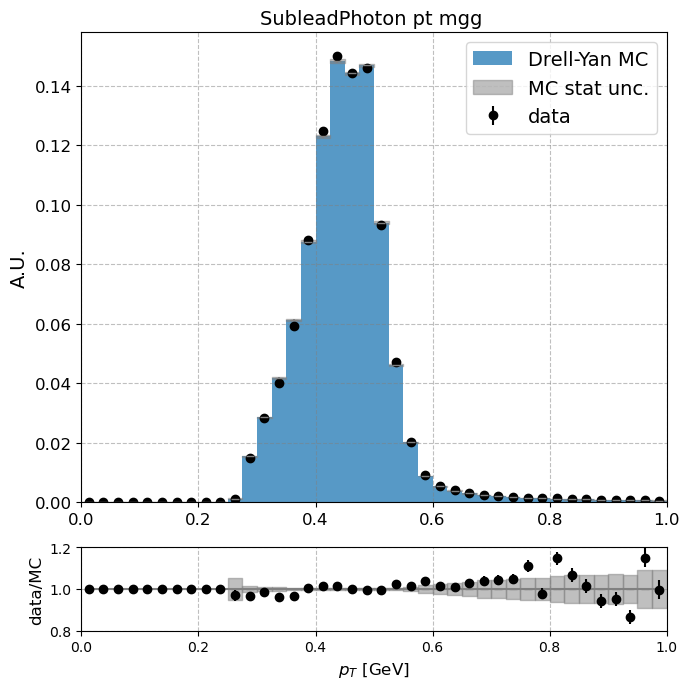

In [ ]:

#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "SubleadPhoton_pt_mgg"
min_ = 0.
max_ = 1
nbins = 40
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"])), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC_rwg"])
h_stack_err["MC"] =  h_stack_err["MC"] / integrals["MC_rwg"] ** 2

h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt] / integrals["data"])
h_data_err.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"] / integrals["data"] ** 2)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim(min_, max_)
ax0.set_xlim(min_, max_)
ax1.set_xlabel('$p_T$ [GeV]', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

/tmp/ipykernel_3914/45491197.py:100: RuntimeWarning: invalid value encountered in divide
  bins_data / mc["bins"]["tot"],
/tmp/ipykernel_3914/45491197.py:104: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")
/tmp/ipykernel_3914/45491197.py:107: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")


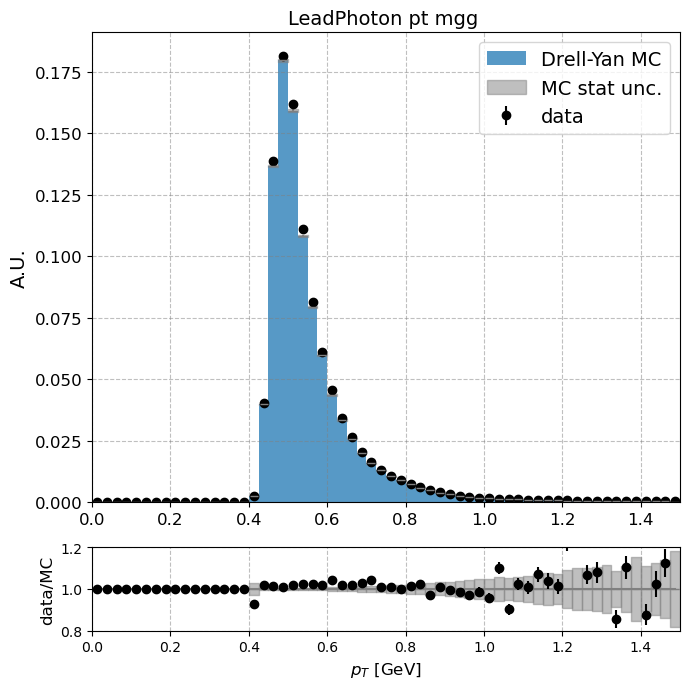

In [ ]:

#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "LeadPhoton_pt_mgg"
min_ = 0.
max_ = 1.5
nbins = 60
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"])), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC_rwg"])
h_stack_err["MC"] =  h_stack_err["MC"] / integrals["MC_rwg"] ** 2

h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt] / integrals["data"])
h_data_err.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"] / integrals["data"] ** 2)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim(min_, max_)
ax0.set_xlim(min_, max_)
ax1.set_xlabel('$p_T$ [GeV]', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

/tmp/ipykernel_3914/3938764125.py:100: RuntimeWarning: invalid value encountered in divide
  bins_data / mc["bins"]["tot"],
/tmp/ipykernel_3914/3938764125.py:104: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")
/tmp/ipykernel_3914/3938764125.py:107: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")


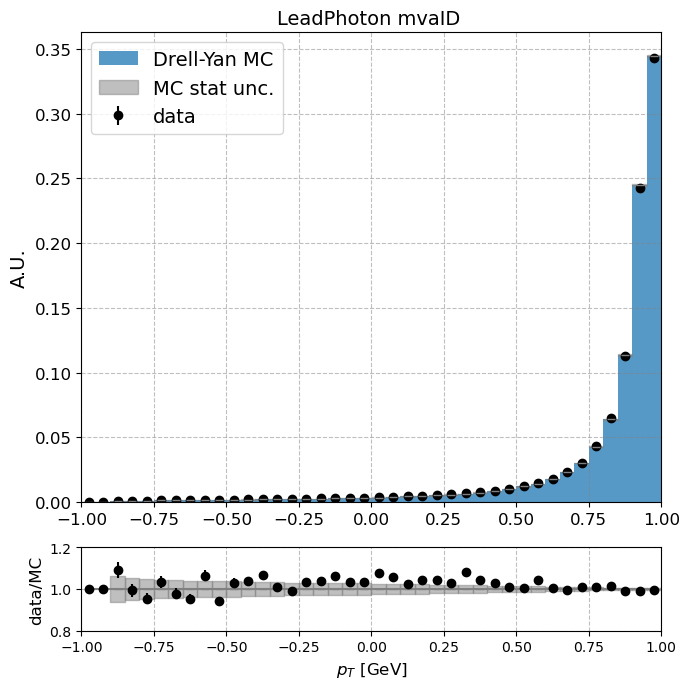

In [ ]:

#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "LeadPhoton_mvaID"
min_ = -1.
max_ = 1
nbins = 40
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"])), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC_rwg"])
h_stack_err["MC"] =  h_stack_err["MC"] / integrals["MC_rwg"] ** 2

h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt] / integrals["data"])
h_data_err.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"] / integrals["data"] ** 2)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim(min_, max_)
ax0.set_xlim(min_, max_)
ax1.set_xlabel('$p_T$ [GeV]', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

/tmp/ipykernel_3914/1213411308.py:100: RuntimeWarning: invalid value encountered in divide
  bins_data / mc["bins"]["tot"],
/tmp/ipykernel_3914/1213411308.py:104: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")
/tmp/ipykernel_3914/1213411308.py:107: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")


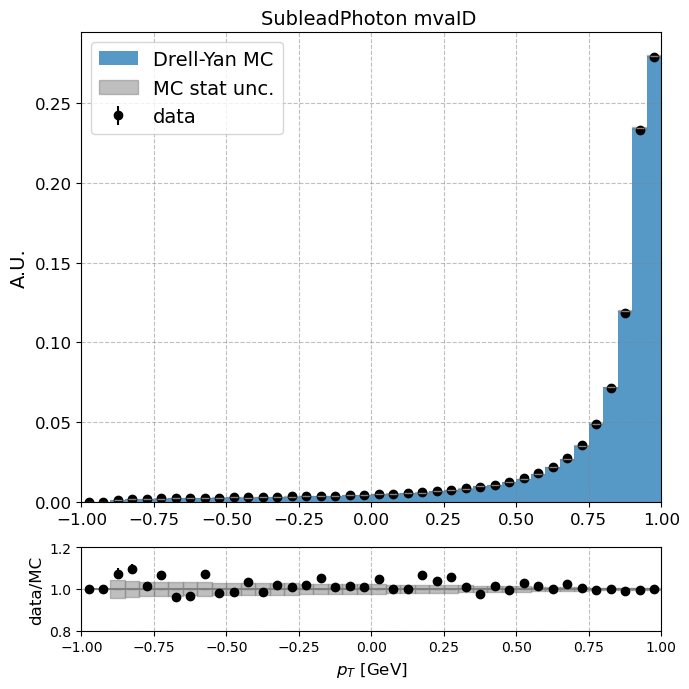

In [ ]:

#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "SubleadPhoton_mvaID"
min_ = -1.
max_ = 1
nbins = 40
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"])), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC_rwg"])
h_stack_err["MC"] =  h_stack_err["MC"] / integrals["MC_rwg"] ** 2

h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt] / integrals["data"])
h_data_err.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"] / integrals["data"] ** 2)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim(min_, max_)
ax0.set_xlim(min_, max_)
ax1.set_xlabel('$p_T$ [GeV]', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

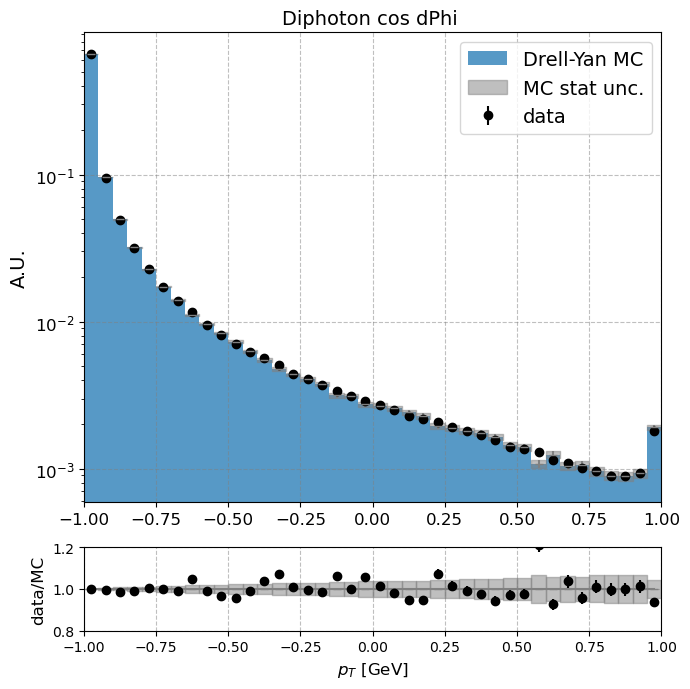

In [ ]:

#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "Diphoton_cos_dPhi"
min_ = -1.
max_ = 1
nbins = 40
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"])), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC_rwg"])
h_stack_err["MC"] =  h_stack_err["MC"] / integrals["MC_rwg"] ** 2

h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt] / integrals["data"])
h_data_err.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"] / integrals["data"] ** 2)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim(min_, max_)
ax0.set_xlim(min_, max_)
ax0.set_yscale('log')
ax1.set_xlabel('$p_T$ [GeV]', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

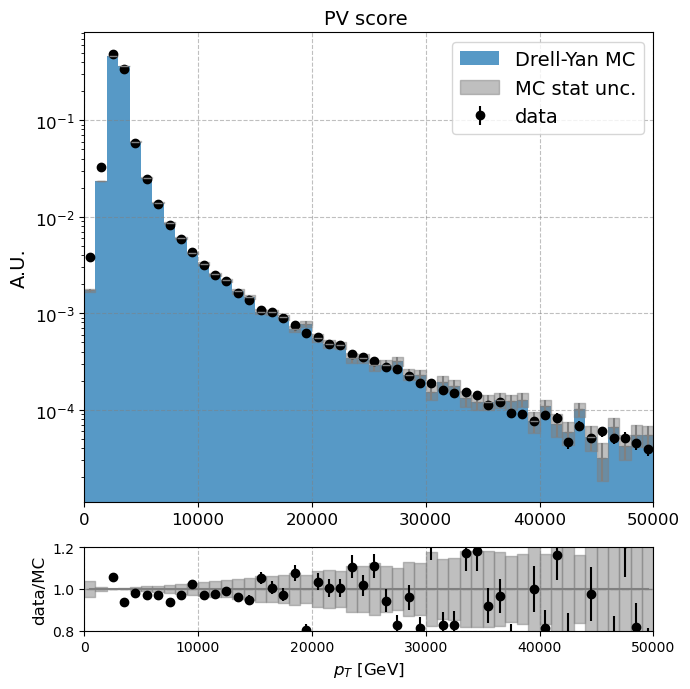

In [ ]:

#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "PV_score"
min_ = 0.
max_ = 50000
nbins = 50
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"])), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC_rwg"])
h_stack_err["MC"] =  h_stack_err["MC"] / integrals["MC_rwg"] ** 2

h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt] / integrals["data"])
h_data_err.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"] / integrals["data"] ** 2)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim(min_, max_)
ax0.set_xlim(min_, max_)
ax0.set_yscale('log')
ax1.set_xlabel('$p_T$ [GeV]', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

/tmp/ipykernel_3914/3325242027.py:100: RuntimeWarning: invalid value encountered in divide
  bins_data / mc["bins"]["tot"],
/tmp/ipykernel_3914/3325242027.py:104: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")
/tmp/ipykernel_3914/3325242027.py:107: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")


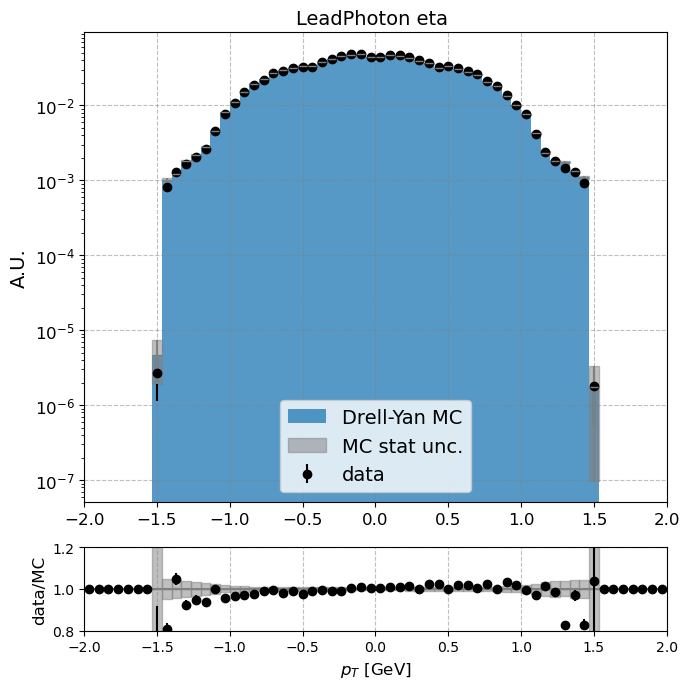

In [ ]:

#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "LeadPhoton_eta"
min_ = -2.
max_ = 2
nbins = 60
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"])), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC_rwg"])
h_stack_err["MC"] =  h_stack_err["MC"] / integrals["MC_rwg"] ** 2

h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt] / integrals["data"])
h_data_err.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"] / integrals["data"] ** 2)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim(min_, max_)
ax0.set_xlim(min_, max_)
ax0.set_yscale('log')
ax1.set_xlabel('$p_T$ [GeV]', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

/tmp/ipykernel_3914/4233151513.py:100: RuntimeWarning: invalid value encountered in divide
  bins_data / mc["bins"]["tot"],
/tmp/ipykernel_3914/4233151513.py:104: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")
/tmp/ipykernel_3914/4233151513.py:107: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")


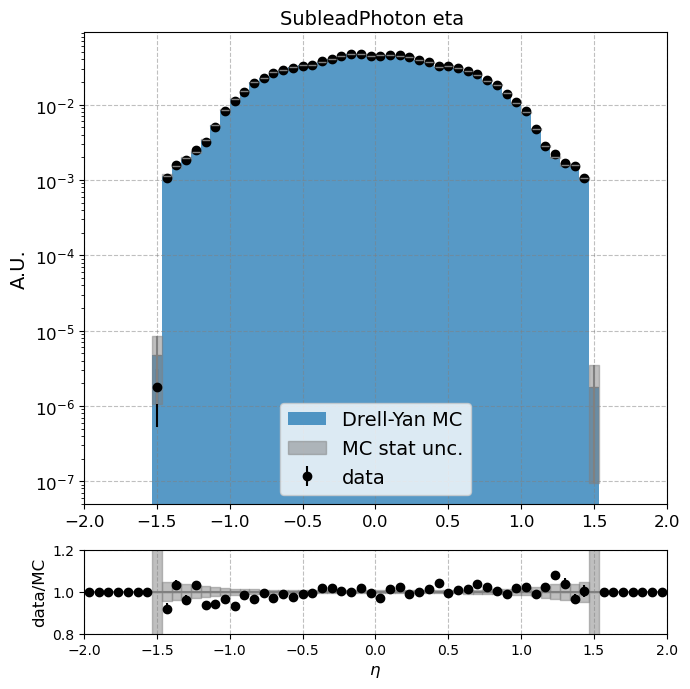

In [ ]:

#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "SubleadPhoton_eta"
min_ = -2.
max_ = 2
nbins = 60
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"])), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC_rwg"])
h_stack_err["MC"] =  h_stack_err["MC"] / integrals["MC_rwg"] ** 2

h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt] / integrals["data"])
h_data_err.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"] / integrals["data"] ** 2)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim(min_, max_)
ax0.set_xlim(min_, max_)
ax0.set_yscale('log')
ax1.set_xlabel('$\eta$', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

/tmp/ipykernel_3914/1675496454.py:100: RuntimeWarning: divide by zero encountered in divide
  bins_data / mc["bins"]["tot"],
/tmp/ipykernel_3914/1675496454.py:104: RuntimeWarning: divide by zero encountered in divide
  ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")
/tmp/ipykernel_3914/1675496454.py:107: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")


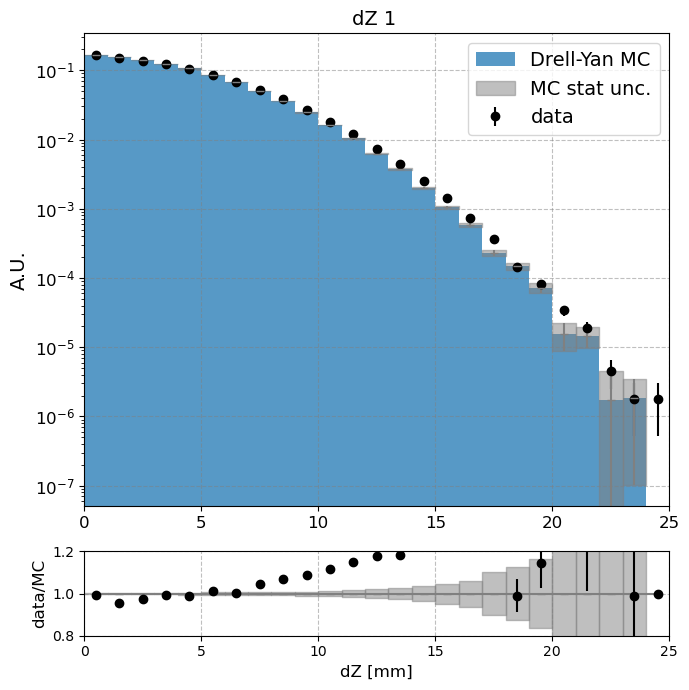

In [ ]:

#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "dZ_1"
min_ = 0.
max_ = 25
nbins = 25
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"])), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC_rwg"])
h_stack_err["MC"] =  h_stack_err["MC"] / integrals["MC_rwg"] ** 2

h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt] / integrals["data"])
h_data_err.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"] / integrals["data"] ** 2)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim(min_, max_)
ax0.set_xlim(min_, max_)
ax0.set_yscale('log')
ax1.set_xlabel('dZ [mm]', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

/tmp/ipykernel_3914/3038349513.py:100: RuntimeWarning: divide by zero encountered in divide
  bins_data / mc["bins"]["tot"],
/tmp/ipykernel_3914/3038349513.py:100: RuntimeWarning: invalid value encountered in divide
  bins_data / mc["bins"]["tot"],
/tmp/ipykernel_3914/3038349513.py:104: RuntimeWarning: divide by zero encountered in divide
  ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = abs(bins_err/mc["bins"]["tot"]), color="black", marker="o", linestyle="", label="data")
/tmp/ipykernel_3914/3038349513.py:104: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = abs(bins_err/mc["bins"]["tot"]), color="black", marker="o", linestyle="", label="data")
/tmp/ipykernel_3914/3038349513.py:107: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey'

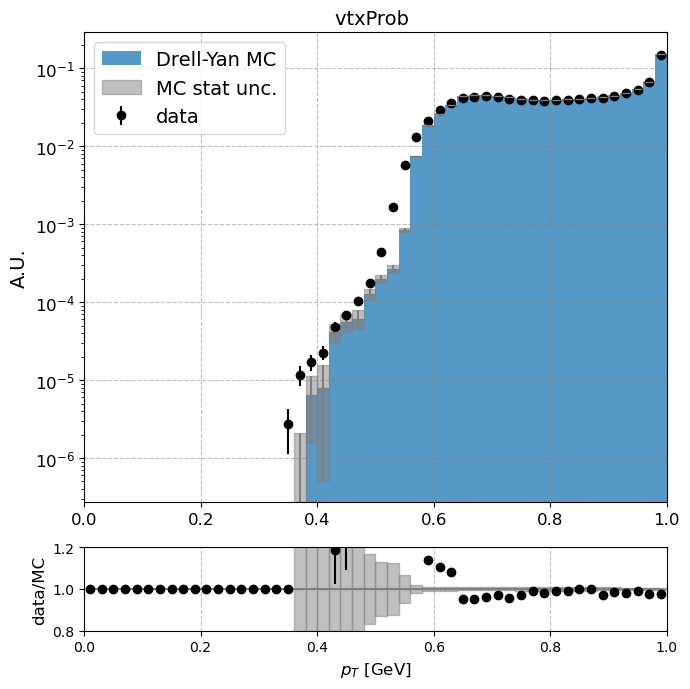

In [ ]:

#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "vtxProb"
min_ = 0.
max_ = 1
nbins = 50
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"])), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC_rwg"])
h_stack_err["MC"] =  h_stack_err["MC"] / integrals["MC_rwg"] ** 2

h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt] / integrals["data"])
h_data_err.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"] / integrals["data"] ** 2)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = abs(bins_err/mc["bins"]["tot"]), color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim(min_, max_)
ax0.set_xlim(min_, max_)
ax0.set_yscale('log')
ax1.set_xlabel('$p_T$ [GeV]', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

In [ ]:

#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "first_jet_"
min_ = 0.
max_ = 1
nbins = 50
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"])), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC_rwg"])
h_stack_err["MC"] =  h_stack_err["MC"] / integrals["MC_rwg"] ** 2

h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt] / integrals["data"])
h_data_err.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"] / integrals["data"] ** 2)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = abs(bins_err/mc["bins"]["tot"]), color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.8,1.2])
ax1.set_xlim(min_, max_)
ax0.set_xlim(min_, max_)
ax0.set_yscale('log')
ax1.set_xlabel('$p_T$ [GeV]', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")


#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "PV_chi2"
min_ = 0.
max_ = 4
nbins = 50
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"])), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC_rwg"])
h_stack_err["MC"] =  h_stack_err["MC"] / integrals["MC_rwg"] ** 2

h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt] / integrals["data"])
h_data_err.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"] / integrals["data"] ** 2)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.5,1.5])
ax1.set_xlim(min_, max_)
ax0.set_xlim(min_, max_)
ax0.set_yscale('log')
ax1.set_xlabel('$p_T$ [GeV]', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")



#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "nPV"
min_ = 0.
max_ = 50
nbins = 50
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["MC"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

full_hist.fill(ax = fileset["MC"][var], weight = fileset["MC"][wgt] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")
full_hist_err.fill(ax = fileset["MC"][var], weight = fileset["MC"]["square_weight"] * mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]), c="MC")

h_stack = full_hist.stack("c")

h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = full_hist[:,"MC"].to_numpy()[0]
mc["edges"]["tot"] = full_hist[:,"MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(full_hist_err[:,"MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i, x in enumerate(mc["edges"]["tot"][:-1]):
    if i == 0:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

h_data = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data_err = hist.Hist(hist.axis.Regular(bins = nbins, start = min_, stop = max_, name="ax", label="data"))
h_data.fill(ax = fileset["data"][var], weight = fileset["data"][wgt])
h_data.fill(ax = fileset["data"][var], weight = fileset["data"]["square_weight"])

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = h_data.to_numpy()
# error calculation
bins_err = np.sqrt(h_data_err.to_numpy()[0])
# eliminate last edge to have same size
edges_data = np.resize(edges_data, nbins)
# center the bins
edges_data = edges_data + half_bin
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot(mc["edges"]["tot"][:-1], ak.ones_like(mc["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["tot"][:-1], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i, x in enumerate(mc["edges"]["tot"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn[i]/mc["bins"]["tot"][i], ydn[i]/mc["bins"]["tot"][i]], [yup[i]/mc["bins"]["tot"][i], yup[i]/mc["bins"]["tot"][i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.5,1.5])
ax1.set_xlim(min_, max_)
ax0.set_xlim(min_, max_)
ax0.set_yscale('log')
ax1.set_xlabel('$p_T$ [GeV]', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")


# Uncertainty calculation

0.79
1.0


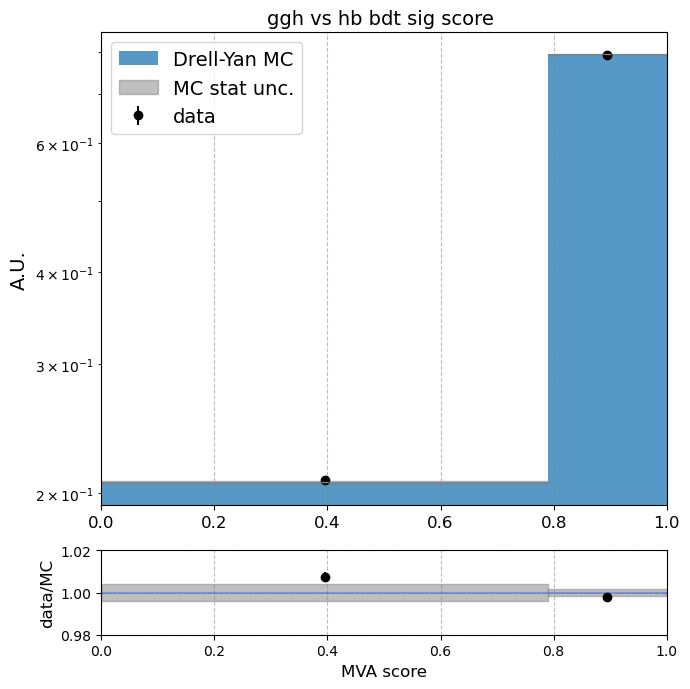

In [ ]:
#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "ggh_vs_hb_bdt_sig_score"
min_ = 0.
max_ = 1
nbins = 50
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

bin_edges_sig = np.array([0, 0.79, 1])  # Adjust as needed

full_hist = (
    hist.Hist.new
    .StrCat(["MC"], name="c", growth=True)
    .Var(bin_edges_sig, name="ax", label="sig_bdt")
    .Weight()
    .fill(
        c="MC",
        ax=fileset["MC"][var],
        weight=fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]))
    )
)

full_hist_err = (
    hist.Hist.new
    .StrCat(["MC"], name="c", growth=True)
    .Var(bin_edges_sig, name="ax", label="sig_bdt")
    .Weight()
    .fill(
        c="MC",
        ax=fileset["MC"][var],
        weight=fileset["MC"]["square_weight"] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]))
    )
)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC_rwg"])
h_stack_err["MC"] =  h_stack_err["MC"] / integrals["MC_rwg"] ** 2

h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i in range(1, len(bin_edges_sig)):
    if i == 1:
        ax0.fill_between([bin_edges_sig[i-1], bin_edges_sig[i]], [ydn[i-1], ydn[i-1]], [yup[i-1], yup[i-1]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([bin_edges_sig[i-1], bin_edges_sig[i]], [ydn[i-1], ydn[i-1]], [yup[i-1], yup[i-1]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")


h_data = (
    hist.Hist.new
    .StrCat(["data"], name="c", growth=True)
    .Var(bin_edges_sig, name="ax", label="sig_bdt")
    .Weight()
    .fill(
        c="data",
        ax=fileset["data"][var],
        weight=fileset["data"][wgt] / integrals["data"]
    )
)

h_data_err = (
    hist.Hist.new
    .StrCat(["data"], name="c", growth=True)
    .Var(bin_edges_sig, name="ax", label="sig_bdt")
    .Weight()
    .fill(
        c="data",
        ax=fileset["data"][var],
        weight=fileset["data"]["square_weight"] / integrals["data"] ** 2
    )
)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = ak.flatten(h_data.to_numpy()[0]), h_data.to_numpy()[2]
# error calculation
bins_err = np.sqrt(ak.flatten(h_data_err.to_numpy()[0]))
# eliminate last edge to have same size
edges_data =[]
# center the bins
for i in range(1, len(bin_edges_sig)):
    edges_data.append(bin_edges_sig[i] - (bin_edges_sig[i] - bin_edges_sig[i-1])/2)
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot([0, 1], ak.ones_like(mc["bins"]["tot"]), color="royalblue", alpha=0.5, marker="_", linestyle="-", label="mc")
ax1.errorbar(edges_data[:], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i in range(1, len(bin_edges_sig)):
    print(bin_edges_sig[i])
    ax1.fill_between([bin_edges_sig[i-1], bin_edges_sig[i]], [ydn[i-1]/mc["bins"]["tot"][i-1], ydn[i-1]/mc["bins"]["tot"][i-1]], [yup[i-1]/mc["bins"]["tot"][i-1], yup[i-1]/mc["bins"]["tot"][i-1]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.98,1.02])
ax1.set_xlim([0,1])
ax0.set_xlim([0,1])
ax0.set_yscale('log')
ax1.set_xlabel('MVA score', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

In [ ]:
dump_bdt_error = {
    "sig": [],
    "vh": [],
    "vbf": [],
    "tth": []
}

In [ ]:
data_err = bins_err/mc["bins"]["tot"]
mc_err = yup/mc["bins"]["tot"]-1
stat_err = np.sqrt(data_err ** 2 + mc_err ** 2)
bdt_err = np.sqrt((1 - ratio) ** 2 - stat_err ** 2)
tot_err = np.sqrt(bdt_err ** 2 + stat_err ** 2)

print("bdt_err", bdt_err)
dump_bdt_error["sig"] = bdt_err.to_list()


bdt_err [0.00595, 0.00036]


0.9
1.0


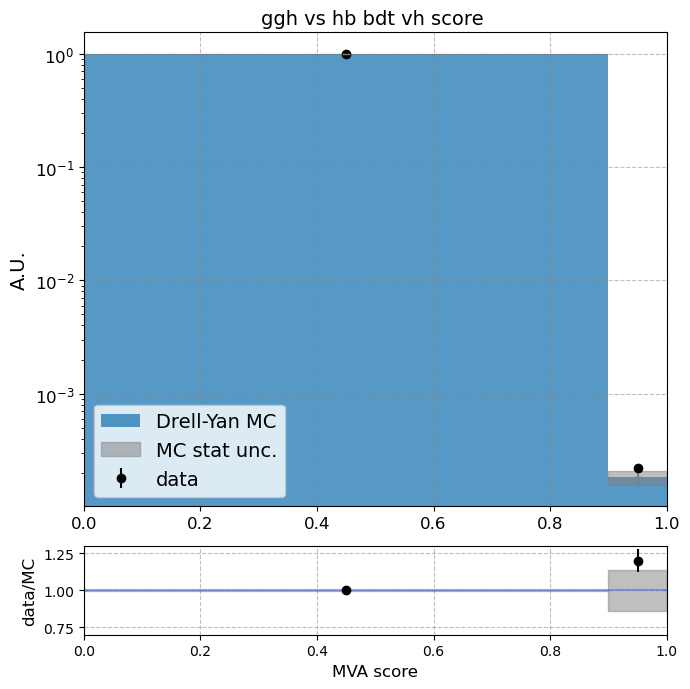

In [ ]:
#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "ggh_vs_hb_bdt_vh_score"
min_ = 0.
max_ = 1
nbins = 50
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

bin_edges_sig = np.array([0, 0.9, 1])  # Adjust as needed

full_hist = (
    hist.Hist.new
    .StrCat(["MC"], name="c", growth=True)
    .Var(bin_edges_sig, name="ax", label="sig_bdt")
    .Weight()
    .fill(
        c="MC",
        ax=fileset["MC"][var],
        weight=fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]))
    )
)

full_hist_err = (
    hist.Hist.new
    .StrCat(["MC"], name="c", growth=True)
    .Var(bin_edges_sig, name="ax", label="sig_bdt")
    .Weight()
    .fill(
        c="MC",
        ax=fileset["MC"][var],
        weight=fileset["MC"]["square_weight"] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]))
    )
)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC_rwg"])
h_stack_err["MC"] =  h_stack_err["MC"] / integrals["MC_rwg"] ** 2

h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i in range(1, len(bin_edges_sig)):
    if i == 1:
        ax0.fill_between([bin_edges_sig[i-1], bin_edges_sig[i]], [ydn[i-1], ydn[i-1]], [yup[i-1], yup[i-1]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([bin_edges_sig[i-1], bin_edges_sig[i]], [ydn[i-1], ydn[i-1]], [yup[i-1], yup[i-1]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")


h_data = (
    hist.Hist.new
    .StrCat(["data"], name="c", growth=True)
    .Var(bin_edges_sig, name="ax", label="sig_bdt")
    .Weight()
    .fill(
        c="data",
        ax=fileset["data"][var],
        weight=fileset["data"][wgt] / integrals["data"]
    )
)

h_data_err = (
    hist.Hist.new
    .StrCat(["data"], name="c", growth=True)
    .Var(bin_edges_sig, name="ax", label="sig_bdt")
    .Weight()
    .fill(
        c="data",
        ax=fileset["data"][var],
        weight=fileset["data"]["square_weight"] / integrals["data"] ** 2
    )
)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = ak.flatten(h_data.to_numpy()[0]), h_data.to_numpy()[2]
# error calculation
bins_err = np.sqrt(ak.flatten(h_data_err.to_numpy()[0]))
# eliminate last edge to have same size
edges_data =[]
# center the bins
for i in range(1, len(bin_edges_sig)):
    edges_data.append(bin_edges_sig[i] - (bin_edges_sig[i] - bin_edges_sig[i-1])/2)
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot([0, 1], ak.ones_like(mc["bins"]["tot"]), color="royalblue", alpha=0.5, marker="_", linestyle="-", label="mc")
ax1.errorbar(edges_data[:], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i in range(1, len(bin_edges_sig)):
    print(bin_edges_sig[i])
    ax1.fill_between([bin_edges_sig[i-1], bin_edges_sig[i]], [ydn[i-1]/mc["bins"]["tot"][i-1], ydn[i-1]/mc["bins"]["tot"][i-1]], [yup[i-1]/mc["bins"]["tot"][i-1], yup[i-1]/mc["bins"]["tot"][i-1]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.7,1.3])
ax1.set_xlim([0,1])
ax0.set_xlim([0,1])
ax0.set_yscale('log')
ax1.set_xlabel('MVA score', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

In [ ]:
data_err = bins_err/mc["bins"]["tot"]
mc_err = yup/mc["bins"]["tot"]-1
stat_err = np.sqrt(data_err ** 2 + mc_err ** 2)
bdt_err = np.sqrt((1 - ratio) ** 2 - stat_err ** 2)
tot_err = np.sqrt(bdt_err ** 2 + stat_err ** 2)
bdt_err = np.nan_to_num(bdt_err, nan=0)

print("bdt_err", bdt_err)


dump_bdt_error["vh"] = bdt_err.to_list()

bdt_err [0, 0.123]


/work/bevila_t/MINICONDA3/envs/dev-higgs-dna/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(


0.9
1.0


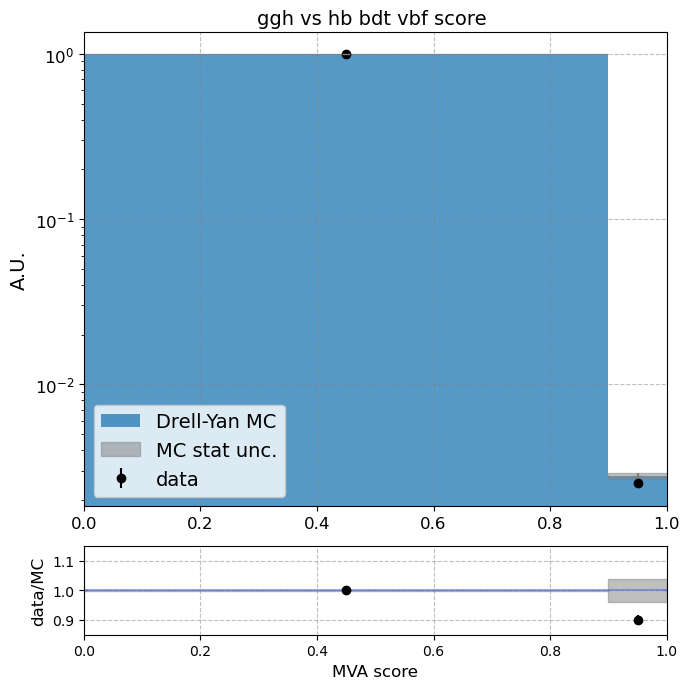

In [ ]:
#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "ggh_vs_hb_bdt_vbf_score"
min_ = 0.
max_ = 1
nbins = 50
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

bin_edges_sig = np.array([0, 0.9, 1])  # Adjust as needed

full_hist = (
    hist.Hist.new
    .StrCat(["MC"], name="c", growth=True)
    .Var(bin_edges_sig, name="ax", label="sig_bdt")
    .Weight()
    .fill(
        c="MC",
        ax=fileset["MC"][var],
        weight=fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]))
    )
)

full_hist_err = (
    hist.Hist.new
    .StrCat(["MC"], name="c", growth=True)
    .Var(bin_edges_sig, name="ax", label="sig_bdt")
    .Weight()
    .fill(
        c="MC",
        ax=fileset["MC"][var],
        weight=fileset["MC"]["square_weight"] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]))
    )
)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC_rwg"])
h_stack_err["MC"] =  h_stack_err["MC"] / integrals["MC_rwg"] ** 2

h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i in range(1, len(bin_edges_sig)):
    if i == 1:
        ax0.fill_between([bin_edges_sig[i-1], bin_edges_sig[i]], [ydn[i-1], ydn[i-1]], [yup[i-1], yup[i-1]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([bin_edges_sig[i-1], bin_edges_sig[i]], [ydn[i-1], ydn[i-1]], [yup[i-1], yup[i-1]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")


h_data = (
    hist.Hist.new
    .StrCat(["data"], name="c", growth=True)
    .Var(bin_edges_sig, name="ax", label="sig_bdt")
    .Weight()
    .fill(
        c="data",
        ax=fileset["data"][var],
        weight=fileset["data"][wgt] / integrals["data"]
    )
)

h_data_err = (
    hist.Hist.new
    .StrCat(["data"], name="c", growth=True)
    .Var(bin_edges_sig, name="ax", label="sig_bdt")
    .Weight()
    .fill(
        c="data",
        ax=fileset["data"][var],
        weight=fileset["data"]["square_weight"] / integrals["data"] ** 2
    )
)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = ak.flatten(h_data.to_numpy()[0]), h_data.to_numpy()[2]
# error calculation
bins_err = np.sqrt(ak.flatten(h_data_err.to_numpy()[0]))
# eliminate last edge to have same size
edges_data =[]
# center the bins
for i in range(1, len(bin_edges_sig)):
    edges_data.append(bin_edges_sig[i] - (bin_edges_sig[i] - bin_edges_sig[i-1])/2)
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot([0, 1], ak.ones_like(mc["bins"]["tot"]), color="royalblue", alpha=0.5, marker="_", linestyle="-", label="mc")
ax1.errorbar(edges_data[:], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i in range(1, len(bin_edges_sig)):
    print(bin_edges_sig[i])
    ax1.fill_between([bin_edges_sig[i-1], bin_edges_sig[i]], [ydn[i-1]/mc["bins"]["tot"][i-1], ydn[i-1]/mc["bins"]["tot"][i-1]], [yup[i-1]/mc["bins"]["tot"][i-1], yup[i-1]/mc["bins"]["tot"][i-1]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.85,1.15])
ax1.set_xlim([0,1])
ax0.set_xlim([0,1])
ax0.set_yscale('log')
ax1.set_xlabel('MVA score', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

In [ ]:
data_err = bins_err/mc["bins"]["tot"]
mc_err = yup/mc["bins"]["tot"]-1
stat_err = np.sqrt(data_err ** 2 + mc_err ** 2)
bdt_err = np.sqrt((1 - ratio) ** 2 - stat_err ** 2)
tot_err = np.sqrt(bdt_err ** 2 + stat_err ** 2)
bdt_err = np.nan_to_num(bdt_err, nan=0)

print("bdt_err", bdt_err)


dump_bdt_error["vbf"] = bdt_err.to_list()

bdt_err [0, 0.0895]


/work/bevila_t/MINICONDA3/envs/dev-higgs-dna/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(


0.9
1.0


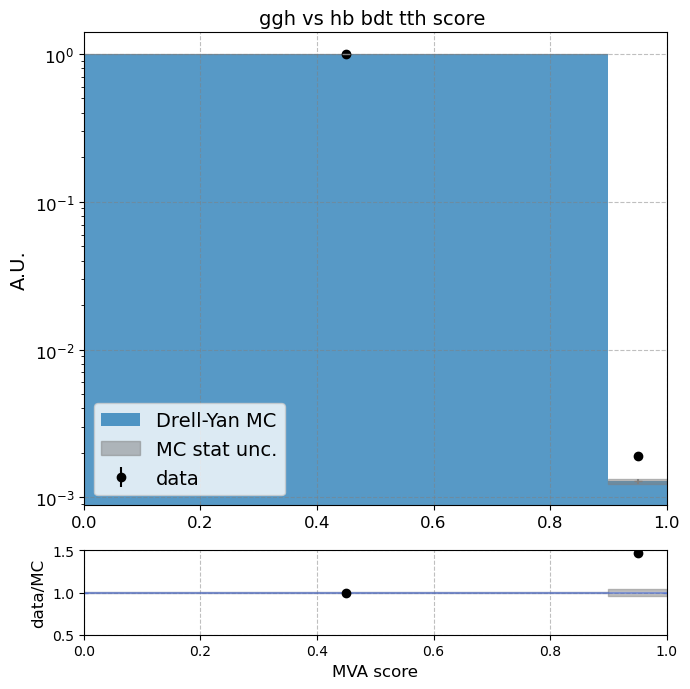

In [ ]:
#bdt_score
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "ggh_vs_hb_bdt_tth_score"
min_ = 0.
max_ = 1
nbins = 50
half_bin = (max_ - min_) / (2 * nbins)

title = ""
for x in var.split("_"):
    title += f"{x} "

wgt="weight_norm"

bin_edges_sig = np.array([0, 0.9, 1])  # Adjust as needed

full_hist = (
    hist.Hist.new
    .StrCat(["MC"], name="c", growth=True)
    .Var(bin_edges_sig, name="ax", label="sig_bdt")
    .Weight()
    .fill(
        c="MC",
        ax=fileset["MC"][var],
        weight=fileset["MC"][wgt] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]))
    )
)

full_hist_err = (
    hist.Hist.new
    .StrCat(["MC"], name="c", growth=True)
    .Var(bin_edges_sig, name="ax", label="sig_bdt")
    .Weight()
    .fill(
        c="MC",
        ax=fileset["MC"][var],
        weight=fileset["MC"]["square_weight"] * (mc_to_data.to_evaluator().evaluate(fileset["MC"]["pt"], fileset["MC"]["mass"]))
    )
)

integrals = {}
sum = 0.
for sample in ["data", "MC"]:
    sum += ak.sum(fileset[sample][wgt])
    integrals[sample] = ak.sum(fileset[sample][wgt])
    fileset[sample]["square_weight"] = (fileset[sample][wgt]) ** 2
integrals["tot"] = sum
integrals["MC_rwg"] = ak.sum(fileset[sample][wgt] * mc_to_data.to_evaluator().evaluate(fileset[sample]["pt"], fileset[sample]["mass"]))

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack["MC"] =  h_stack["MC"] / (integrals["MC_rwg"])
h_stack_err["MC"] =  h_stack_err["MC"] / integrals["MC_rwg"] ** 2

h_stack[::-1].plot(ax=ax0, stack=True, histtype="fill", alpha=0.75, label="Drell-Yan MC")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
mc["bins"]["tot"] = h_stack["MC"].to_numpy()[0]
mc["edges"]["tot"] = h_stack["MC"].to_numpy()[1] + half_bin
mc["errs"]["tot"] = np.sqrt(h_stack_err["MC"].to_numpy()[0])

#create up and down edges to plot shaded area for each bin
ydn = [mc["bins"]["tot"][i] - x for i, x in enumerate(mc["errs"]["tot"])]
yup = [mc["bins"]["tot"][i] + x for i, x in enumerate(mc["errs"]["tot"])]

# plot shaded area for MC errors
for i in range(1, len(bin_edges_sig)):
    if i == 1:
        ax0.fill_between([bin_edges_sig[i-1], bin_edges_sig[i]], [ydn[i-1], ydn[i-1]], [yup[i-1], yup[i-1]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
    else:
        ax0.fill_between([bin_edges_sig[i-1], bin_edges_sig[i]], [ydn[i-1], ydn[i-1]], [yup[i-1], yup[i-1]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")


h_data = (
    hist.Hist.new
    .StrCat(["data"], name="c", growth=True)
    .Var(bin_edges_sig, name="ax", label="sig_bdt")
    .Weight()
    .fill(
        c="data",
        ax=fileset["data"][var],
        weight=fileset["data"][wgt] / integrals["data"]
    )
)

h_data_err = (
    hist.Hist.new
    .StrCat(["data"], name="c", growth=True)
    .Var(bin_edges_sig, name="ax", label="sig_bdt")
    .Weight()
    .fill(
        c="data",
        ax=fileset["data"][var],
        weight=fileset["data"]["square_weight"] / integrals["data"] ** 2
    )
)

# Data plotting
# conversion to numpy because we want the scatter plot
bins_data, edges_data = ak.flatten(h_data.to_numpy()[0]), h_data.to_numpy()[2]
# error calculation
bins_err = np.sqrt(ak.flatten(h_data_err.to_numpy()[0]))
# eliminate last edge to have same size
edges_data =[]
# center the bins
for i in range(1, len(bin_edges_sig)):
    edges_data.append(bin_edges_sig[i] - (bin_edges_sig[i] - bin_edges_sig[i-1])/2)
# plot
ax0.errorbar(edges_data, bins_data, yerr = bins_err, color="black", marker="o", linestyle="", label="data")
   
# cosmetics
ax0.set_ylabel('A.U.', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)

# plot error bars
ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
    mc["bins"]["tot"] != 0,
    bins_data / mc["bins"]["tot"],
    ak.ones_like(mc["bins"]["tot"])
)
ax1.plot([0, 1], ak.ones_like(mc["bins"]["tot"]), color="royalblue", alpha=0.5, marker="_", linestyle="-", label="mc")
ax1.errorbar(edges_data[:], ratio, yerr = bins_err/mc["bins"]["tot"], color="black", marker="o", linestyle="", label="data")

for i in range(1, len(bin_edges_sig)):
    print(bin_edges_sig[i])
    ax1.fill_between([bin_edges_sig[i-1], bin_edges_sig[i]], [ydn[i-1]/mc["bins"]["tot"][i-1], ydn[i-1]/mc["bins"]["tot"][i-1]], [yup[i-1]/mc["bins"]["tot"][i-1], yup[i-1]/mc["bins"]["tot"][i-1]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.")

ax1.set_ylim([0.5,1.5])
ax1.set_xlim([0,1])
ax0.set_xlim([0,1])
ax0.set_yscale('log')
ax1.set_xlabel('MVA score', fontsize=12)
ax1.set_ylabel('data/MC', fontsize=12)
plt.tight_layout()
    
plt.savefig(f"plots/{var}_dist_data_mc_scatter_{year}.pdf")

In [ ]:
data_err = bins_err/mc["bins"]["tot"]
mc_err = yup/mc["bins"]["tot"]-1
stat_err = np.sqrt(data_err ** 2 + mc_err ** 2)
bdt_err = np.sqrt((1 - ratio) ** 2 - stat_err ** 2)
tot_err = np.sqrt(bdt_err ** 2 + stat_err ** 2)
bdt_err = np.nan_to_num(bdt_err, nan=0)

print("bdt_err", bdt_err)


dump_bdt_error["tth"] = bdt_err.to_list()

bdt_err [0, 0.467]


/work/bevila_t/MINICONDA3/envs/dev-higgs-dna/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(


In [ ]:
dump_bdt_error

{'sig': [0.005953922554759809, 0.00036010404650940053],
 'vh': [0.0, 0.12332165103720376],
 'vbf': [0.0, 0.08953017607089313],
 'tth': [0.0, 0.466886357787057]}

In [ ]:
Y = year
if "2016" in Y:
    if "Pre" in Y:
        Y = "2016PreVFP"
    elif "Pre" in Y:
        Y = "2016PostVFP"
    else:
        Y = "2016" 

with open(f"ggH_vs_RB_unc_{Y}.json", "w") as file:
    file.write(json.dumps(dump_bdt_error))